## PLANEJAMENTO E CONTROLE DA EXPANSÃO TERRITORIAL URBANA NA IMPLEMENTAÇÃO DO PLANO DIRETOR

### **Capítulo 3** | Áreas urbanizadas em cidades de porte médio: análise comparativa de municípios paulistas no período 2005-2015

##### **Autoria:** Isabel Cristina Nunes de Sousa
---

## **Pacotes**

Carrega bibliotecas já instaladas:

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes
from watermark import watermark

%load_ext watermark

Versões dos pacotes:

In [2]:
%watermark --watermark

Watermark: 2.3.1



In [3]:
%watermark --iversions

numpy     : 1.24.3
pandas    : 2.0.1
scipy     : 1.10.1
descartes : 1.1.0
seaborn   : 0.12.2
geopandas : 0.13.0
matplotlib: 3.7.1



Informações de *hardware*:

In [4]:
print(watermark())

Last updated: 2023-06-21T17:32:08.838835-03:00

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.14.0

Compiler    : MSC v.1934 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



## **Funções**

In [5]:
def infos(df, tipo_df, col):
    
    """Sintetiza informações das bases de dados"""
    
    # número total de municípios na base
    n_munics = df[col].nunique()
    # dimensionalidade da base
    linhas_cols = df.shape
    
    print('Número de municípios na base:', n_munics)
    print('\nQuantidade de linhas e colunas na base:', linhas_cols)

    if tipo_df == 'geral':
        # tipos de dados de cada coluna
        tipos = df.dtypes
        # GeoDataFrame
        tipo_base = type(df)
        # Coordinate Reference System - CRS (SIRGAS 2000)
        crs_base = df.crs
        
        print('\nTipos de dados de cada coluna:\n')
        print(tipos)
        print('\nGeoDataFrame:', tipo_base)
        print('\nSistema de Referência de Coordenadas:', crs_base) 
        
    else:
        # lista de municípios na base
        munics = df[col].unique()
        print('\nLista de municípios na base:\n')
        
        print(munics)

In [6]:
def agrupa(df, col_munics, col_areas, tipo):
    
    """Quantidade | Área das manchas urbanizadas por município"""
    
    if tipo == 'quantidade':
        return df.groupby(col_munics)[col_areas].count()
    else:
        return df.groupby(col_munics)[col_areas].sum()

In [7]:
def box_hist_kde(col_esq, x_label_esq, col_dir, x_label_dir, plot_abaixo):

    """Plota boxplots e histogramas | KDEs na mesma figura"""
    
    fig, ((ax_acima_1, ax_acima_2), 
          (ax_abaixo_1, ax_abaixo_2)) = plt.subplots(2, 2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})

    # média e mediana (esquerda)
    mean_esq=df_tgca[col_esq].mean()
    median_esq=df_tgca[col_esq].median()

    # média e mediana (direita)
    mean_dir=df_tgca[col_dir].mean()
    median_dir=df_tgca[col_dir].median()

    # boxplot (esquerda)
    sns.boxplot(data=df_tgca, x=col_esq, ax=ax_acima_1)
    ax_acima_1.axvline(mean_esq, color='r', linestyle='--')
    ax_acima_1.axvline(median_esq, color='g', linestyle='--')

    ax_acima_1.set(xlabel='')
    ax_acima_1.set(ylabel='')
    
    # boxplot (direita)
    sns.boxplot(data=df_tgca, x=col_dir, ax=ax_acima_2)
    ax_acima_2.axvline(mean_dir, color='r', linestyle='--')
    ax_acima_2.axvline(median_dir, color='g', linestyle='--')
        
    ax_acima_2.set(xlabel='')
    ax_acima_2.set(ylabel='')

    # histograma ou KDE
    
    if plot_abaixo == 'histograma':
        
        # histograma (esquerda)
        sns.histplot(data=df_tgca, x=col_esq, ax=ax_abaixo_1)
        ax_abaixo_1.axvline(mean_esq, color='r', linestyle='--')
        ax_abaixo_1.axvline(median_esq, color='g', linestyle='--')
        
        ax_abaixo_1.set(xlabel=x_label_esq)
        ax_abaixo_1.set(ylabel='')
        ax_abaixo_1.legend(['Média', 'Mediana'])
        
        # histograma (direita)
        sns.histplot(data=df_tgca, x=col_dir, ax=ax_abaixo_2)
        ax_abaixo_2.axvline(mean_dir, color='r', linestyle='--')
        ax_abaixo_2.axvline(median_dir, color='g', linestyle='--')
        
        ax_abaixo_2.set(xlabel=x_label_dir)
        ax_abaixo_2.set(ylabel='')
        ax_abaixo_2.legend(['Média', 'Mediana'])
        
    else:
        
        # KDE (esquerda)
        sns.kdeplot(data=df_tgca, x=col_esq, ax=ax_abaixo_1)
        ax_abaixo_1.axvline(mean_esq, color='r', linestyle='--')
        ax_abaixo_1.axvline(median_esq, color='g', linestyle='--')
        
        ax_abaixo_1.set(xlabel=x_label_esq)
        ax_abaixo_1.set(ylabel='')
        ax_abaixo_1.legend(['Média', 'Mediana'])
        
        # KDE (direita)
        sns.kdeplot(data=df_tgca, x=col_dir, ax=ax_abaixo_2)
        ax_abaixo_2.axvline(mean_dir, color='r', linestyle='--')
        ax_abaixo_2.axvline(median_dir, color='g', linestyle='--')
        
        ax_abaixo_2.set(xlabel=x_label_dir)
        ax_abaixo_2.set(ylabel='')
        ax_abaixo_2.legend(['Média', 'Mediana'])

    plt.tight_layout()
    plt.show()

---

## **Carregamento das Bases de Dados**

### *2005*

In [8]:
# Carrega base de dados de 2005
df2005_orig = gpd.read_file('dados/AreasUrbanizadas_MunicipiosAcima100k_porMunicipio.shp')

# Cria cópia do DataFrame original
df2005 = df2005_orig.copy()

# Exibe 5 primeiras linhas da base de 2005
df2005.head()

,Tipo,GEOCODIGO,GEOC_URB,POP_2005,NOME_MUNIC,UF,Area_Km2,geometry
0,Densa,1100122,1100122001,112439.0,Ji-Paraná,RO,0.99,"POLYGON ((-61.96670 -10.85650, -61.96661 -10.8..."
1,Densa,1100122,1100122002,112439.0,Ji-Paraná,RO,9.69,"POLYGON ((-61.97096 -10.89053, -61.97128 -10.8..."
2,Densa,1100122,1100122003,112439.0,Ji-Paraná,RO,14.84,"POLYGON ((-61.89986 -10.86867, -61.90041 -10.8..."
3,Pouco densa,1100122,1100122004,112439.0,Ji-Paraná,RO,0.53,"POLYGON ((-62.00899 -11.06986, -62.00910 -11.0..."
4,Pouco densa,1100122,1100122005,112439.0,Ji-Paraná,RO,0.80,"POLYGON ((-61.68801 -10.79494, -61.69343 -10.7..."


In [9]:
# Aplica função para sintetizar dados da base
infos(df=df2005, tipo_df='geral', col='NOME_MUNIC')

Número de municípios na base: 235

Quantidade de linhas e colunas na base: (2829, 8)

Tipos de dados de cada coluna:

Tipo            object
GEOCODIGO       object
GEOC_URB        object
POP_2005       float64
NOME_MUNIC      object
UF              object
Area_Km2       float64
geometry      geometry
dtype: object

GeoDataFrame: <class 'geopandas.geodataframe.GeoDataFrame'>

Sistema de Referência de Coordenadas: EPSG:4674


---

### *2015a*

In [10]:
# Carrega base de dados de 2015 (100 a 300 mil)
df2015a_orig = gpd.read_file('dados/AreasUrbanizadasDoBrasil_2015_Concentracoes_Urbanas_de_100000_a_300000_habitantes.shp')

# Cria cópia do DataFrame original
df2015a = df2015a_orig.copy()

# Exibe 5 primeiras linhas da base de 2015
df2015a.head()

,Densidade,Tipo,Shape_Leng,Shape_Area,CodConcUrb,NomConcUrb,AREA_GEO,UF,geometry
0,Densa,Área urbanizada,0.197521,0.000613,1500107,Abaetetuba,7.543536,PA,"POLYGON ((-48.86921 -1.72148, -48.86883 -1.722..."
1,Pouco densa,Área urbanizada,0.083199,0.000119,1500107,Abaetetuba,1.466894,PA,"POLYGON ((-48.85547 -1.73070, -48.85621 -1.731..."
2,Pouco densa,Área urbanizada,0.059082,0.000044,1500107,Abaetetuba,0.537141,PA,"POLYGON ((-48.86623 -1.73334, -48.86633 -1.733..."
3,Densa,Área urbanizada,0.021362,0.000020,1500107,Abaetetuba,0.246169,PA,"POLYGON ((-48.85621 -1.73109, -48.85547 -1.730..."
4,Pouco densa,Área urbanizada,0.031231,0.000013,1500107,Abaetetuba,0.162899,PA,"POLYGON ((-48.84782 -1.72656, -48.84818 -1.725..."


In [11]:
# Aplica função para sintetizar dados da base
infos(df=df2015a, tipo_df='geral', col='NomConcUrb')

Número de municípios na base: 120

Quantidade de linhas e colunas na base: (3662, 9)

Tipos de dados de cada coluna:

Densidade       object
Tipo            object
Shape_Leng     float64
Shape_Area     float64
CodConcUrb      object
NomConcUrb      object
AREA_GEO       float64
UF              object
geometry      geometry
dtype: object

GeoDataFrame: <class 'geopandas.geodataframe.GeoDataFrame'>

Sistema de Referência de Coordenadas: EPSG:4674


---

### *2015b*

In [12]:
# Carrega base de dados de 2015 (> 300 mil)
df2015b_orig = gpd.read_file('dados/AreasUrbanizadasDoBrasil_2015_Concentracoes_Urbanas_com_mais_de_300000_habitantes.shp')

# Cria cópia do DataFrame original
df2015b = df2015b_orig.copy()

# Exibe 5 primeiras linhas da base de 2015
df2015b.head()

,OBJECTID,FID_1,Densidade,Tipo,CodConcUrb,NomeConcUr,AREA_GEO,Shape_Leng,Shape_Area,geometry
0,1,8624,Pouco densa,Área urbanizada,4314902,Porto Alegre/RS,0.037384,0.008212,0.000003,"POLYGON Z ((-51.14219 -30.11189 0.00000, -51.1..."
1,2,141,Densa,Área urbanizada,3300704,Cabo Frio/RJ,1.023648,0.068116,0.000090,"POLYGON Z ((-42.22103 -22.91976 0.00000, -42.2..."
2,3,9166,Pouco densa,Área urbanizada,3304557,Rio de Janeiro/RJ,0.232927,0.032190,0.000020,"POLYGON Z ((-42.58973 -22.86439 0.00000, -42.5..."
3,4,4780,Pouco densa,Área urbanizada,3106200,Belo Horizonte/MG,0.126662,0.015264,0.000011,"POLYGON Z ((-44.24291 -20.14539 0.00000, -44.2..."
4,5,4781,Pouco densa,Área urbanizada,3106200,Belo Horizonte/MG,0.137572,0.033661,0.000012,"POLYGON Z ((-44.23794 -20.14716 0.00000, -44.2..."


### *População urbana e rural*

In [13]:
# Carrega base de dados da população urbana e rural paulista (SEADE)
pop_urb_rur_orig = pd.read_csv('dados/pop_urb_rur2000a2050mun.csv', sep=';', encoding='latin-1')

# Cria cópia do DataFrame original
pop_urb_rur = pop_urb_rur_orig.copy()

# Exibe 5 primeiras linhas da base
pop_urb_rur.head()

,cod_ibge,municipio,ano,pop_urb,pop_rur,pop_tot,grau_urb
0,3500105,Adamantina,2000,30356,3128,33484,"90,66"
1,3500204,Adolfo,2000,3068,612,3680,"83,37"
2,3500303,Aguaí,2000,24664,3481,28145,"87,63"
3,3500402,Águas da Prata,2000,6072,1055,7127,"85,2"
4,3500501,Águas de Lindóia,2000,15420,725,16145,"95,51"


### *Limites territoriais municipais*

In [14]:
# Carrega base de dados de 2022 (IBGE)
munic_sp_2022_orig = gpd.read_file('dados/SP_Municipios_2022.shp')

# Cria cópia do DataFrame original
munic_sp_2022 = munic_sp_2022_orig.copy()

# Exibe 5 primeiras linhas
munic_sp_2022.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


## **Tratamento dos Dados**

### *2005 (55 cidades)*

#### Limpeza

In [15]:
# Tipos de dados da base de 2005
df2005.dtypes

Tipo            object
GEOCODIGO       object
GEOC_URB        object
POP_2005       float64
NOME_MUNIC      object
UF              object
Area_Km2       float64
geometry      geometry
dtype: object

In [16]:
# Converte coluna POP_2005 de float para int
df2005['POP_2005'] = df2005['POP_2005'].astype(int)

# Confere se conversão foi feita
df2005.dtypes

Tipo            object
GEOCODIGO       object
GEOC_URB        object
POP_2005         int32
NOME_MUNIC      object
UF              object
Area_Km2       float64
geometry      geometry
dtype: object

In [17]:
# Filtra apenas cidades paulistas com população entre 100 e 500 mil habitantes
df2005_cds = df2005_cds = df2005[(df2005['UF'] == 'SP') & (df2005['POP_2005'].between(100000, 500000))].copy()

# Exibe 5 primeiras linhas
df2005_cds.head()

,Tipo,GEOCODIGO,GEOC_URB,POP_2005,NOME_MUNIC,UF,Area_Km2,geometry
298,Pouco densa,3518404,3518404001,111673,Guaratinguetá,SP,0.55,"POLYGON ((-45.20816 -22.77472, -45.21006 -22.7..."
299,Pouco densa,3518404,3518404002,111673,Guaratinguetá,SP,3.20,"POLYGON ((-45.24516 -22.78020, -45.24433 -22.7..."
300,Densa,3518404,3518404003,111673,Guaratinguetá,SP,0.63,"POLYGON ((-45.23338 -22.80720, -45.24112 -22.8..."
301,Pouco densa,3518404,3518404004,111673,Guaratinguetá,SP,0.55,"POLYGON ((-45.15914 -22.79876, -45.15724 -22.7..."
302,Densa,3518404,3518404005,111673,Guaratinguetá,SP,21.11,"POLYGON ((-45.16331 -22.78615, -45.16640 -22.7..."


In [18]:
# Aplica função para sintetizar dados da base
infos(df=df2005_cds, tipo_df='cidades', col='NOME_MUNIC')

Número de municípios na base: 55

Quantidade de linhas e colunas na base: (515, 8)

Lista de municípios na base:

['Guaratinguetá' 'Bragança Paulista' 'Mogi Guaçu' 'Rio Claro' 'Araras'
 'Limeira' 'Piracicaba' "Santa Bárbara d'Oeste" 'São Carlos' 'Araraquara'
 'Franca' 'Barretos' 'Catanduva' 'Araçatuba' 'Presidente Prudente'
 'Marília' 'Bauru' 'Jaú' 'Botucatu' 'Itapetininga' 'Indaiatuba'
 'Americana' 'Hortolândia' 'Sumaré' 'Jundiaí' 'Franco da Rocha' 'Atibaia'
 'Praia Grande' 'São Vicente' 'Guarujá' 'Cubatão' 'Santos' 'Jacareí'
 'Taubaté' 'Pindamonhangaba' 'São José do Rio Preto' 'Barueri'
 'Carapicuíba' 'Cotia' 'Diadema' 'Embu' 'Ferraz de Vasconcelos'
 'Itapecerica da Serra' 'Itapevi' 'Itaquaquecetuba' 'Mauá'
 'Mogi das Cruzes' 'Ribeirão Pires' 'São Caetano do Sul' 'Suzano'
 'Taboão da Serra' 'Francisco Morato' 'Itu' 'Ourinhos' 'Tatuí']


#### Lista de cidades

In [19]:
# 55 cidades 
cidades = df2005_cds['NOME_MUNIC'].unique()
print(f'{len(cidades)} cidades:\n{cidades}')

55 cidades:
['Guaratinguetá' 'Bragança Paulista' 'Mogi Guaçu' 'Rio Claro' 'Araras'
 'Limeira' 'Piracicaba' "Santa Bárbara d'Oeste" 'São Carlos' 'Araraquara'
 'Franca' 'Barretos' 'Catanduva' 'Araçatuba' 'Presidente Prudente'
 'Marília' 'Bauru' 'Jaú' 'Botucatu' 'Itapetininga' 'Indaiatuba'
 'Americana' 'Hortolândia' 'Sumaré' 'Jundiaí' 'Franco da Rocha' 'Atibaia'
 'Praia Grande' 'São Vicente' 'Guarujá' 'Cubatão' 'Santos' 'Jacareí'
 'Taubaté' 'Pindamonhangaba' 'São José do Rio Preto' 'Barueri'
 'Carapicuíba' 'Cotia' 'Diadema' 'Embu' 'Ferraz de Vasconcelos'
 'Itapecerica da Serra' 'Itapevi' 'Itaquaquecetuba' 'Mauá'
 'Mogi das Cruzes' 'Ribeirão Pires' 'São Caetano do Sul' 'Suzano'
 'Taboão da Serra' 'Francisco Morato' 'Itu' 'Ourinhos' 'Tatuí']


### *2015a (18 cidades)*

#### Com vazios urbanos

In [20]:
# Seleciona apenas informações das cidades listadas
df2015a_cds_tot = df2015a[(df2015a['NomConcUrb'].isin(cidades)) & (df2015a['UF'] == 'SP')].copy()

# Exibe 5 primeiras linhas
df2015a_cds_tot.head()

,Densidade,Tipo,Shape_Leng,Shape_Area,CodConcUrb,NomConcUrb,AREA_GEO,UF,geometry
133,Densa,Área urbanizada,0.761507,0.003668,3502804,Araçatuba,42.160896,SP,"POLYGON ((-50.41432 -21.22905, -50.41387 -21.2..."
134,Densa,Outros equipamentos urbanos,0.013460,0.000010,3502804,Araçatuba,0.118206,SP,"POLYGON ((-50.41008 -21.23488, -50.40581 -21.2..."
135,Densa,Outros equipamentos urbanos,0.057871,0.000127,3502804,Araçatuba,1.461997,SP,"POLYGON ((-50.43338 -21.14930, -50.42169 -21.1..."
136,Densa,Vazio intraurbano,0.049796,0.000064,3502804,Araçatuba,0.731868,SP,"POLYGON ((-50.47331 -21.21798, -50.47234 -21.2..."
137,Pouco densa,Área urbanizada,0.045163,0.000057,3502804,Araçatuba,0.660574,SP,"POLYGON ((-50.46687 -21.17685, -50.46771 -21.1..."


In [21]:
# Aplica função para sintetizar dados da base filtrada (por UF e porte pop.)
infos(df=df2015a_cds_tot, tipo_df='cidades', col='NomConcUrb')

Número de municípios na base: 18

Quantidade de linhas e colunas na base: (623, 9)

Lista de municípios na base:

['Araçatuba' 'Araraquara' 'Araras' 'Atibaia' 'Barretos' 'Botucatu'
 'Bragança Paulista' 'Catanduva' 'Guaratinguetá' 'Indaiatuba'
 'Itapetininga' 'Jaú' 'Limeira' 'Marília' 'Ourinhos' 'Rio Claro'
 'São Carlos' 'Tatuí']


#### Sem vazios urbanos

In [22]:
# Seleciona apenas informações das cidades listadas (sem vazios intraurbanos)
df2015a_cds = df2015a[(df2015a['NomConcUrb'].isin(cidades)) & (df2015a['Tipo'] != 'Vazio intraurbano')].copy()

# Exibe 5 primeiras linhas
df2015a_cds.head()

,Densidade,Tipo,Shape_Leng,Shape_Area,CodConcUrb,NomConcUrb,AREA_GEO,UF,geometry
133,Densa,Área urbanizada,0.761507,0.003668,3502804,Araçatuba,42.160896,SP,"POLYGON ((-50.41432 -21.22905, -50.41387 -21.2..."
134,Densa,Outros equipamentos urbanos,0.013460,0.000010,3502804,Araçatuba,0.118206,SP,"POLYGON ((-50.41008 -21.23488, -50.40581 -21.2..."
135,Densa,Outros equipamentos urbanos,0.057871,0.000127,3502804,Araçatuba,1.461997,SP,"POLYGON ((-50.43338 -21.14930, -50.42169 -21.1..."
137,Pouco densa,Área urbanizada,0.045163,0.000057,3502804,Araçatuba,0.660574,SP,"POLYGON ((-50.46687 -21.17685, -50.46771 -21.1..."
138,Densa,Área urbanizada,0.073022,0.000069,3502804,Araçatuba,0.793573,SP,"POLYGON ((-50.45797 -21.14971, -50.45794 -21.1..."


In [23]:
# Aplica função para sintetizar dados da base filtrada (por UF e porte pop.)
infos(df=df2015a_cds, tipo_df='cidades', col='NomConcUrb')

Número de municípios na base: 18

Quantidade de linhas e colunas na base: (612, 9)

Lista de municípios na base:

['Araçatuba' 'Araraquara' 'Araras' 'Atibaia' 'Barretos' 'Botucatu'
 'Bragança Paulista' 'Catanduva' 'Guaratinguetá' 'Indaiatuba'
 'Itapetininga' 'Jaú' 'Limeira' 'Marília' 'Ourinhos' 'Rio Claro'
 'São Carlos' 'Tatuí']


#### Lista de cidades

In [24]:
# 18 cidades (poderia ser também com df2015a_cds_tot)
cidades_2015a = df2015a_cds['NomConcUrb'].unique()
print(f'{len(cidades_2015a)} cidades:\n{cidades_2015a}')

18 cidades:
['Araçatuba' 'Araraquara' 'Araras' 'Atibaia' 'Barretos' 'Botucatu'
 'Bragança Paulista' 'Catanduva' 'Guaratinguetá' 'Indaiatuba'
 'Itapetininga' 'Jaú' 'Limeira' 'Marília' 'Ourinhos' 'Rio Claro'
 'São Carlos' 'Tatuí']


---

### *2015b (7 cidades)*

#### Limpeza

In [25]:
# Valores únicos para coluna com nomes e UFs dos municípios
df2015b['NomeConcUr'].sort_values().unique()

array(['Americana - Santa Bárbara d´Oeste/SP', 'Anápolis', 'Aracaju/SE',
       'Baixada Santista/SP', 'Bauru/SP', 'Belo Horizonte/MG', 'Belém/PA',
       'Blumenau/SC', 'Boa Vista', 'Brasília/DF', 'Cabo Frio/RJ',
       'Campina Grande/PB', 'Campinas/SP', 'Campo Grande',
       'Campos dos Goytacazes/RJ', 'Caruaru', 'Caxias do Sul/RS',
       'Criciúma/SC', 'Cuiabá/MT', 'Curitiba/PR', 'Feira de Santana',
       'Florianópolis/SC', 'Fortaleza/CE', 'Franca/SP', 'Goiânia/GO',
       'Internacional de Foz do Iguaçu/Brasil - Ciudad del Este/Paraguai',
       'Ipatinga/MG', 'Itajaí - Balneário Camboriú/SC', 'Joinville/SC',
       'João Pessoa/PB', 'Juazeiro do Norte/CE', 'Juiz de Fora/MG',
       'Jundiaí/SP', 'Londrina/PR', 'Macapá/AP',
       'Macaé - Rio das Ostras/RJ', 'Maceió/AL', 'Manaus', 'Maringá/PR',
       'Montes Claros', 'Natal/RN', 'Palmas', 'Pelotas/RS',
       'Petrolina/PE - Juazeiro/BA', 'Petrópolis/RJ', 'Piracicaba/SP',
       'Ponta Grossa/PR', 'Porto Alegre/RS', 'Porto V

In [26]:
# Divide coluna em duas, separando por '/'
divide_barra = df2015b['NomeConcUr'].str.split('/', expand=True)

# Cria colunas para nome da cidade e UF
df2015b['Cidade'] = divide_barra[0]
df2015b['UF'] = divide_barra[1]

# Preenche valores de cidades sem separador, copiando valor da coluna original
df2015b['Cidade'] = df2015b['Cidade'].fillna(df2015b['NomeConcUr'])

# Exibe 5 primeiras linhas
df2015b.head()

,OBJECTID,FID_1,Densidade,Tipo,CodConcUrb,NomeConcUr,AREA_GEO,Shape_Leng,Shape_Area,geometry,Cidade,UF
0,1,8624,Pouco densa,Área urbanizada,4314902,Porto Alegre/RS,0.037384,0.008212,0.000003,"POLYGON Z ((-51.14219 -30.11189 0.00000, -51.1...",Porto Alegre,RS
1,2,141,Densa,Área urbanizada,3300704,Cabo Frio/RJ,1.023648,0.068116,0.000090,"POLYGON Z ((-42.22103 -22.91976 0.00000, -42.2...",Cabo Frio,RJ
2,3,9166,Pouco densa,Área urbanizada,3304557,Rio de Janeiro/RJ,0.232927,0.032190,0.000020,"POLYGON Z ((-42.58973 -22.86439 0.00000, -42.5...",Rio de Janeiro,RJ
3,4,4780,Pouco densa,Área urbanizada,3106200,Belo Horizonte/MG,0.126662,0.015264,0.000011,"POLYGON Z ((-44.24291 -20.14539 0.00000, -44.2...",Belo Horizonte,MG
4,5,4781,Pouco densa,Área urbanizada,3106200,Belo Horizonte/MG,0.137572,0.033661,0.000012,"POLYGON Z ((-44.23794 -20.14716 0.00000, -44.2...",Belo Horizonte,MG


In [27]:
# Valores únicos para coluna com nomes dos municípios
df2015b['Cidade'].unique()

array(['Porto Alegre', 'Cabo Frio', 'Rio de Janeiro', 'Belo Horizonte',
       'Macaé - Rio das Ostras', 'Petrópolis', 'Franca', 'Jundiaí',
       'Presidente Prudente', 'São José dos Campos', 'Sorocaba',
       'Internacional de Foz do Iguaçu', 'São Paulo', 'Curitiba',
       'Ipatinga', 'Juiz de Fora', 'Uberlândia', 'Campos dos Goytacazes',
       'Volta Redonda - Barra Mansa', 'Bauru', 'Campinas',
       'São José do Rio Preto', 'Americana - Santa Bárbara d´Oeste',
       'Piracicaba', 'Ribeirão Preto', 'Itajaí - Balneário Camboriú',
       'Joinville', 'Londrina', 'Maringá', 'Baixada Santista',
       'Ponta Grossa', 'Blumenau', 'Criciúma', 'Caxias do Sul', 'Pelotas',
       'Campo Grande', 'Vitória', 'Florianópolis', 'Belém', 'Macapá',
       'Palmas', 'Anápolis', 'Goiânia', 'Brasília', 'Natal', 'Caruaru',
       'Petrolina', 'Feira de Santana', 'Vitória da Conquista',
       'Montes Claros', 'Fortaleza', 'Recife', 'São Luís', 'Teresina',
       'Juazeiro do Norte', 'Campina Grand

In [28]:
# Valores únicos para coluna com siglas das UFs
df2015b['UF'].unique()

array(['RS', 'RJ', 'MG', 'SP', 'Brasil - Ciudad del Este', 'PR', None,
       'SC', 'ES', 'PA', 'AP', 'GO', 'DF', 'RN', 'PE - Juazeiro', 'CE',
       'PE', 'MA', 'PI', 'PB', 'AL', 'SE', 'BA', 'RO', 'MT'], dtype=object)

In [29]:
# Divide coluna em duas, separando por '-'
df2015b[['Cidade1', 'Cidade2']] = df2015b['Cidade'].str.split('-', expand=True)

# Preenche valores de cidades sem separador, copiando valor da coluna original
df2015b['Cidade2'] = df2015b['Cidade'].fillna(df2015b['Cidade1'])

# Exibe 5 primeiras linhas
df2015b.head()

,OBJECTID,FID_1,Densidade,Tipo,CodConcUrb,NomeConcUr,AREA_GEO,Shape_Leng,Shape_Area,geometry,Cidade,UF,Cidade1,Cidade2
0,1,8624,Pouco densa,Área urbanizada,4314902,Porto Alegre/RS,0.037384,0.008212,0.000003,"POLYGON Z ((-51.14219 -30.11189 0.00000, -51.1...",Porto Alegre,RS,Porto Alegre,Porto Alegre
1,2,141,Densa,Área urbanizada,3300704,Cabo Frio/RJ,1.023648,0.068116,0.000090,"POLYGON Z ((-42.22103 -22.91976 0.00000, -42.2...",Cabo Frio,RJ,Cabo Frio,Cabo Frio
2,3,9166,Pouco densa,Área urbanizada,3304557,Rio de Janeiro/RJ,0.232927,0.032190,0.000020,"POLYGON Z ((-42.58973 -22.86439 0.00000, -42.5...",Rio de Janeiro,RJ,Rio de Janeiro,Rio de Janeiro
3,4,4780,Pouco densa,Área urbanizada,3106200,Belo Horizonte/MG,0.126662,0.015264,0.000011,"POLYGON Z ((-44.24291 -20.14539 0.00000, -44.2...",Belo Horizonte,MG,Belo Horizonte,Belo Horizonte
4,5,4781,Pouco densa,Área urbanizada,3106200,Belo Horizonte/MG,0.137572,0.033661,0.000012,"POLYGON Z ((-44.23794 -20.14716 0.00000, -44.2...",Belo Horizonte,MG,Belo Horizonte,Belo Horizonte


In [30]:
# Novos valores únicos para coluna com nomes dos municípios
df2015b['Cidade1'].unique()

array(['Porto Alegre', 'Cabo Frio', 'Rio de Janeiro', 'Belo Horizonte',
       'Macaé ', 'Petrópolis', 'Franca', 'Jundiaí', 'Presidente Prudente',
       'São José dos Campos', 'Sorocaba',
       'Internacional de Foz do Iguaçu', 'São Paulo', 'Curitiba',
       'Ipatinga', 'Juiz de Fora', 'Uberlândia', 'Campos dos Goytacazes',
       'Volta Redonda ', 'Bauru', 'Campinas', 'São José do Rio Preto',
       'Americana ', 'Piracicaba', 'Ribeirão Preto', 'Itajaí ',
       'Joinville', 'Londrina', 'Maringá', 'Baixada Santista',
       'Ponta Grossa', 'Blumenau', 'Criciúma', 'Caxias do Sul', 'Pelotas',
       'Campo Grande', 'Vitória', 'Florianópolis', 'Belém', 'Macapá',
       'Palmas', 'Anápolis', 'Goiânia', 'Brasília', 'Natal', 'Caruaru',
       'Petrolina', 'Feira de Santana', 'Vitória da Conquista',
       'Montes Claros', 'Fortaleza', 'Recife', 'São Luís', 'Teresina',
       'Juazeiro do Norte', 'Campina Grande', 'João Pessoa', 'Maceió',
       'Aracaju', 'Salvador', 'Porto Velho', 'Rio 

In [31]:
# Corrige dados errôneos
df2015b['Cidade1'] = df2015b['Cidade1'].replace({'Macaé ': 'Macaé', 'Americana ': 'Americana', 'Itajaí ': 'Itajaí'})

# Valores únicos para coluna com nomes dos municípios após correções
df2015b['Cidade1'].unique()

array(['Porto Alegre', 'Cabo Frio', 'Rio de Janeiro', 'Belo Horizonte',
       'Macaé', 'Petrópolis', 'Franca', 'Jundiaí', 'Presidente Prudente',
       'São José dos Campos', 'Sorocaba',
       'Internacional de Foz do Iguaçu', 'São Paulo', 'Curitiba',
       'Ipatinga', 'Juiz de Fora', 'Uberlândia', 'Campos dos Goytacazes',
       'Volta Redonda ', 'Bauru', 'Campinas', 'São José do Rio Preto',
       'Americana', 'Piracicaba', 'Ribeirão Preto', 'Itajaí', 'Joinville',
       'Londrina', 'Maringá', 'Baixada Santista', 'Ponta Grossa',
       'Blumenau', 'Criciúma', 'Caxias do Sul', 'Pelotas', 'Campo Grande',
       'Vitória', 'Florianópolis', 'Belém', 'Macapá', 'Palmas',
       'Anápolis', 'Goiânia', 'Brasília', 'Natal', 'Caruaru', 'Petrolina',
       'Feira de Santana', 'Vitória da Conquista', 'Montes Claros',
       'Fortaleza', 'Recife', 'São Luís', 'Teresina', 'Juazeiro do Norte',
       'Campina Grande', 'João Pessoa', 'Maceió', 'Aracaju', 'Salvador',
       'Porto Velho', 'Rio Bra

In [32]:
# Remove colunas que não serão utilizadas
df2015b.drop(['OBJECTID', 'FID_1', 'Cidade', 'Cidade2', 'NomeConcUr'], 
             axis=1, inplace=True)

# Renomeia coluna com nomes dos municípios
df2015b.rename(columns={'Cidade1': 'NomConcUrb'}, inplace=True)

# Altera ordem das colunas para padronização
df2015b = df2015b[['Densidade', 'Tipo', 'Shape_Leng', 'Shape_Area', 
                   'CodConcUrb', 'NomConcUrb', 'AREA_GEO', 'UF', 'geometry']]

# Exibe 5 primeiras linhas
df2015b.head()

,Densidade,Tipo,Shape_Leng,Shape_Area,CodConcUrb,NomConcUrb,AREA_GEO,UF,geometry
0,Pouco densa,Área urbanizada,0.008212,0.000003,4314902,Porto Alegre,0.037384,RS,"POLYGON Z ((-51.14219 -30.11189 0.00000, -51.1..."
1,Densa,Área urbanizada,0.068116,0.000090,3300704,Cabo Frio,1.023648,RJ,"POLYGON Z ((-42.22103 -22.91976 0.00000, -42.2..."
2,Pouco densa,Área urbanizada,0.032190,0.000020,3304557,Rio de Janeiro,0.232927,RJ,"POLYGON Z ((-42.58973 -22.86439 0.00000, -42.5..."
3,Pouco densa,Área urbanizada,0.015264,0.000011,3106200,Belo Horizonte,0.126662,MG,"POLYGON Z ((-44.24291 -20.14539 0.00000, -44.2..."
4,Pouco densa,Área urbanizada,0.033661,0.000012,3106200,Belo Horizonte,0.137572,MG,"POLYGON Z ((-44.23794 -20.14716 0.00000, -44.2..."


In [33]:
# Aplica função para sintetizar dados da base
infos(df=df2015b, tipo_df='geral', col='NomConcUrb')

Número de municípios na base: 65

Quantidade de linhas e colunas na base: (10050, 9)

Tipos de dados de cada coluna:

Densidade       object
Tipo            object
Shape_Leng     float64
Shape_Area     float64
CodConcUrb      object
NomConcUrb      object
AREA_GEO       float64
UF              object
geometry      geometry
dtype: object

GeoDataFrame: <class 'geopandas.geodataframe.GeoDataFrame'>

Sistema de Referência de Coordenadas: EPSG:4674


#### Com vazios urbanos

In [34]:
# Seleciona apenas informações das paulistas cidades listadas
df2015b_cds_tot = df2015b[(df2015b['NomConcUrb'].isin(cidades)) & (df2015b['UF'] == 'SP')].copy()

# Exibe 5 primeiras linhas
df2015b_cds_tot.head()

,Densidade,Tipo,Shape_Leng,Shape_Area,CodConcUrb,NomConcUrb,AREA_GEO,UF,geometry
83,Densa,Área urbanizada,0.077736,0.000050,3516200,Franca,0.581828,SP,"POLYGON Z ((-47.28883 -20.39745 0.00000, -47.2..."
84,Densa,Área urbanizada,0.015912,0.000010,3516200,Franca,0.114849,SP,"POLYGON Z ((-47.28726 -20.41303 0.00000, -47.2..."
85,Pouco densa,Área urbanizada,0.045162,0.000038,3516200,Franca,0.444430,SP,"POLYGON Z ((-47.49116 -20.41981 0.00000, -47.4..."
86,Densa,Área urbanizada,0.047930,0.000066,3516200,Franca,0.767510,SP,"POLYGON Z ((-47.42322 -20.45346 0.00000, -47.4..."
87,Pouco densa,Área urbanizada,0.016205,0.000013,3516200,Franca,0.150307,SP,"POLYGON Z ((-47.39383 -20.40816 0.00000, -47.3..."


In [35]:
# Aplica função para sintetizar dados da base filtrada (por UF e porte pop.)
infos(df=df2015b_cds_tot, tipo_df='cidades', col='NomConcUrb')

Número de municípios na base: 7

Quantidade de linhas e colunas na base: (734, 9)

Lista de municípios na base:

['Franca' 'Jundiaí' 'Presidente Prudente' 'Bauru' 'São José do Rio Preto'
 'Americana' 'Piracicaba']


#### Sem vazios urbanos

In [36]:
# Seleciona apenas informações das cidades listadas (sem vazios intraurbanos)
df2015b_cds = df2015b[(df2015b['NomConcUrb'].isin(cidades)) & (df2015b['Tipo'] != 'Vazio intraurbano')].copy()

# Exibe 5 primeiras linhas
df2015b_cds.head()

,Densidade,Tipo,Shape_Leng,Shape_Area,CodConcUrb,NomConcUrb,AREA_GEO,UF,geometry
83,Densa,Área urbanizada,0.077736,0.000050,3516200,Franca,0.581828,SP,"POLYGON Z ((-47.28883 -20.39745 0.00000, -47.2..."
84,Densa,Área urbanizada,0.015912,0.000010,3516200,Franca,0.114849,SP,"POLYGON Z ((-47.28726 -20.41303 0.00000, -47.2..."
85,Pouco densa,Área urbanizada,0.045162,0.000038,3516200,Franca,0.444430,SP,"POLYGON Z ((-47.49116 -20.41981 0.00000, -47.4..."
86,Densa,Área urbanizada,0.047930,0.000066,3516200,Franca,0.767510,SP,"POLYGON Z ((-47.42322 -20.45346 0.00000, -47.4..."
87,Pouco densa,Área urbanizada,0.016205,0.000013,3516200,Franca,0.150307,SP,"POLYGON Z ((-47.39383 -20.40816 0.00000, -47.3..."


In [37]:
# Aplica função para sintetizar dados da base filtrada (por UF e porte pop.)
infos(df=df2015b_cds, tipo_df='cidades', col='NomConcUrb')

Número de municípios na base: 7

Quantidade de linhas e colunas na base: (719, 9)

Lista de municípios na base:

['Franca' 'Jundiaí' 'Presidente Prudente' 'Bauru' 'São José do Rio Preto'
 'Americana' 'Piracicaba']


#### Lista de cidades

In [38]:
# 7 cidades (poderia ser também com df2015b_cds_tot)
cidades_2015b = df2015b_cds['NomConcUrb'].unique()
print(f'{len(cidades_2015b)} cidades:\n{cidades_2015b}')

7 cidades:
['Franca' 'Jundiaí' 'Presidente Prudente' 'Bauru' 'São José do Rio Preto'
 'Americana' 'Piracicaba']


### *2015 (25 cidades)*

In [39]:
# Une listas de cidades de 2015a e 2015b, totalizando 25 cidades
cidades_2015 = cidades_2015a.tolist() + cidades_2015b.tolist()
print(f'{len(cidades_2015)} cidades:\n{cidades_2015}')

25 cidades:
['Araçatuba', 'Araraquara', 'Araras', 'Atibaia', 'Barretos', 'Botucatu', 'Bragança Paulista', 'Catanduva', 'Guaratinguetá', 'Indaiatuba', 'Itapetininga', 'Jaú', 'Limeira', 'Marília', 'Ourinhos', 'Rio Claro', 'São Carlos', 'Tatuí', 'Franca', 'Jundiaí', 'Presidente Prudente', 'Bauru', 'São José do Rio Preto', 'Americana', 'Piracicaba']


#### Com vazios urbanos

In [40]:
# Concatena bases de 2015 (com vazios) e ordena por município
df2015_25cds_c_vazios = pd.concat([df2015a_cds_tot, df2015b_cds_tot])
df2015_25cds_c_vazios.sort_values(by=['NomConcUrb'], inplace=True)

# Exibe 5 primeiras linhas
df2015_25cds_c_vazios.head()

,Densidade,Tipo,Shape_Leng,Shape_Area,CodConcUrb,NomConcUrb,AREA_GEO,UF,geometry
1894,Pouco densa,Área urbanizada,0.020279,0.000017,3501608,Americana,0.187972,SP,"POLYGON Z ((-47.27678 -22.72253 0.00000, -47.2..."
1875,Densa,Área urbanizada,0.069394,0.000142,3501608,Americana,1.619362,SP,"POLYGON Z ((-47.23105 -22.73671 0.00000, -47.2..."
1876,Pouco densa,Área urbanizada,0.025732,0.000029,3501608,Americana,0.327897,SP,"POLYGON Z ((-47.22901 -22.75900 0.00000, -47.2..."
1877,Densa,Área urbanizada,0.117345,0.000200,3501608,Americana,2.274678,SP,"POLYGON Z ((-47.26144 -22.75508 0.00000, -47.2..."
1878,Pouco densa,Área urbanizada,0.016291,0.000008,3501608,Americana,0.096528,SP,"POLYGON Z ((-47.43011 -22.79838 0.00000, -47.4..."


In [41]:
# Aplica função para sintetizar dados da base de cidades
infos(df=df2015_25cds_c_vazios, tipo_df='cidades', col='NomConcUrb')

Número de municípios na base: 25

Quantidade de linhas e colunas na base: (1357, 9)

Lista de municípios na base:

['Americana' 'Araraquara' 'Araras' 'Araçatuba' 'Atibaia' 'Barretos'
 'Bauru' 'Botucatu' 'Bragança Paulista' 'Catanduva' 'Franca'
 'Guaratinguetá' 'Indaiatuba' 'Itapetininga' 'Jaú' 'Jundiaí' 'Limeira'
 'Marília' 'Ourinhos' 'Piracicaba' 'Presidente Prudente' 'Rio Claro'
 'São Carlos' 'São José do Rio Preto' 'Tatuí']


---

#### Sem vazios urbanos

In [42]:
# Concatena bases de 2015 (sem vazios) e ordena por município
df2015_25cds_s_vazios = pd.concat([df2015a_cds, df2015b_cds])
df2015_25cds_s_vazios.sort_values(by=['NomConcUrb'], inplace=True)

# Exibe 5 primeiras linhas
df2015_25cds_s_vazios.head()

,Densidade,Tipo,Shape_Leng,Shape_Area,CodConcUrb,NomConcUrb,AREA_GEO,UF,geometry
1892,Densa,Área urbanizada,0.073584,0.000110,3501608,Americana,1.247550,SP,"POLYGON Z ((-47.26059 -22.72308 0.00000, -47.2..."
1874,Densa,Área urbanizada,0.058318,0.000066,3501608,Americana,0.750827,SP,"POLYGON Z ((-47.25582 -22.74798 0.00000, -47.2..."
1875,Densa,Área urbanizada,0.069394,0.000142,3501608,Americana,1.619362,SP,"POLYGON Z ((-47.23105 -22.73671 0.00000, -47.2..."
1876,Pouco densa,Área urbanizada,0.025732,0.000029,3501608,Americana,0.327897,SP,"POLYGON Z ((-47.22901 -22.75900 0.00000, -47.2..."
1877,Densa,Área urbanizada,0.117345,0.000200,3501608,Americana,2.274678,SP,"POLYGON Z ((-47.26144 -22.75508 0.00000, -47.2..."


In [43]:
# Aplica função para sintetizar dados da base de cidades
infos(df=df2015_25cds_s_vazios, tipo_df='cidades', col='NomConcUrb')

Número de municípios na base: 25

Quantidade de linhas e colunas na base: (1331, 9)

Lista de municípios na base:

['Americana' 'Araraquara' 'Araras' 'Araçatuba' 'Atibaia' 'Barretos'
 'Bauru' 'Botucatu' 'Bragança Paulista' 'Catanduva' 'Franca'
 'Guaratinguetá' 'Indaiatuba' 'Itapetininga' 'Jaú' 'Jundiaí' 'Limeira'
 'Marília' 'Ourinhos' 'Piracicaba' 'Presidente Prudente' 'Rio Claro'
 'São Carlos' 'São José do Rio Preto' 'Tatuí']


### *2005 (25 cidades)*

In [44]:
# Seleciona apenas informações das cidades listadas (2015)
df2005_25cidades = df2005_cds[df2005_cds['NOME_MUNIC'].isin(cidades_2015)].copy()

# Exibe 5 primeiras linhas
df2005_25cidades.head()

,Tipo,GEOCODIGO,GEOC_URB,POP_2005,NOME_MUNIC,UF,Area_Km2,geometry
298,Pouco densa,3518404,3518404001,111673,Guaratinguetá,SP,0.55,"POLYGON ((-45.20816 -22.77472, -45.21006 -22.7..."
299,Pouco densa,3518404,3518404002,111673,Guaratinguetá,SP,3.20,"POLYGON ((-45.24516 -22.78020, -45.24433 -22.7..."
300,Densa,3518404,3518404003,111673,Guaratinguetá,SP,0.63,"POLYGON ((-45.23338 -22.80720, -45.24112 -22.8..."
301,Pouco densa,3518404,3518404004,111673,Guaratinguetá,SP,0.55,"POLYGON ((-45.15914 -22.79876, -45.15724 -22.7..."
302,Densa,3518404,3518404005,111673,Guaratinguetá,SP,21.11,"POLYGON ((-45.16331 -22.78615, -45.16640 -22.7..."


In [45]:
# Aplica função para sintetizar dados da base
infos(df=df2005_25cidades, tipo_df='cidades', col='NOME_MUNIC')

Número de municípios na base: 25

Quantidade de linhas e colunas na base: (316, 8)

Lista de municípios na base:

['Guaratinguetá' 'Bragança Paulista' 'Rio Claro' 'Araras' 'Limeira'
 'Piracicaba' 'São Carlos' 'Araraquara' 'Franca' 'Barretos' 'Catanduva'
 'Araçatuba' 'Presidente Prudente' 'Marília' 'Bauru' 'Jaú' 'Botucatu'
 'Itapetininga' 'Indaiatuba' 'Americana' 'Jundiaí' 'Atibaia'
 'São José do Rio Preto' 'Ourinhos' 'Tatuí']


### *Limites territoriais municipais*

In [46]:
# Seleciona apenas informações das cidades listadas
munic_sp_2022_cidades = munic_sp_2022[munic_sp_2022['NM_MUN'].isin(cidades_2015)].copy()

# Exibe 5 primeiras linhas
munic_sp_2022_cidades.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
18,3501608,Americana,SP,133.912,"POLYGON ((-47.23018 -22.74333, -47.23055 -22.7..."
31,3502804,Araçatuba,SP,1167.126,"POLYGON ((-50.35533 -21.10079, -50.35533 -21.1..."
36,3503208,Araraquara,SP,1003.625,"POLYGON ((-48.17274 -21.96569, -48.17325 -21.9..."
37,3503307,Araras,SP,644.831,"POLYGON ((-47.39783 -22.44338, -47.39813 -22.4..."
47,3504107,Atibaia,SP,478.521,"POLYGON ((-46.48851 -23.11428, -46.48851 -23.1..."


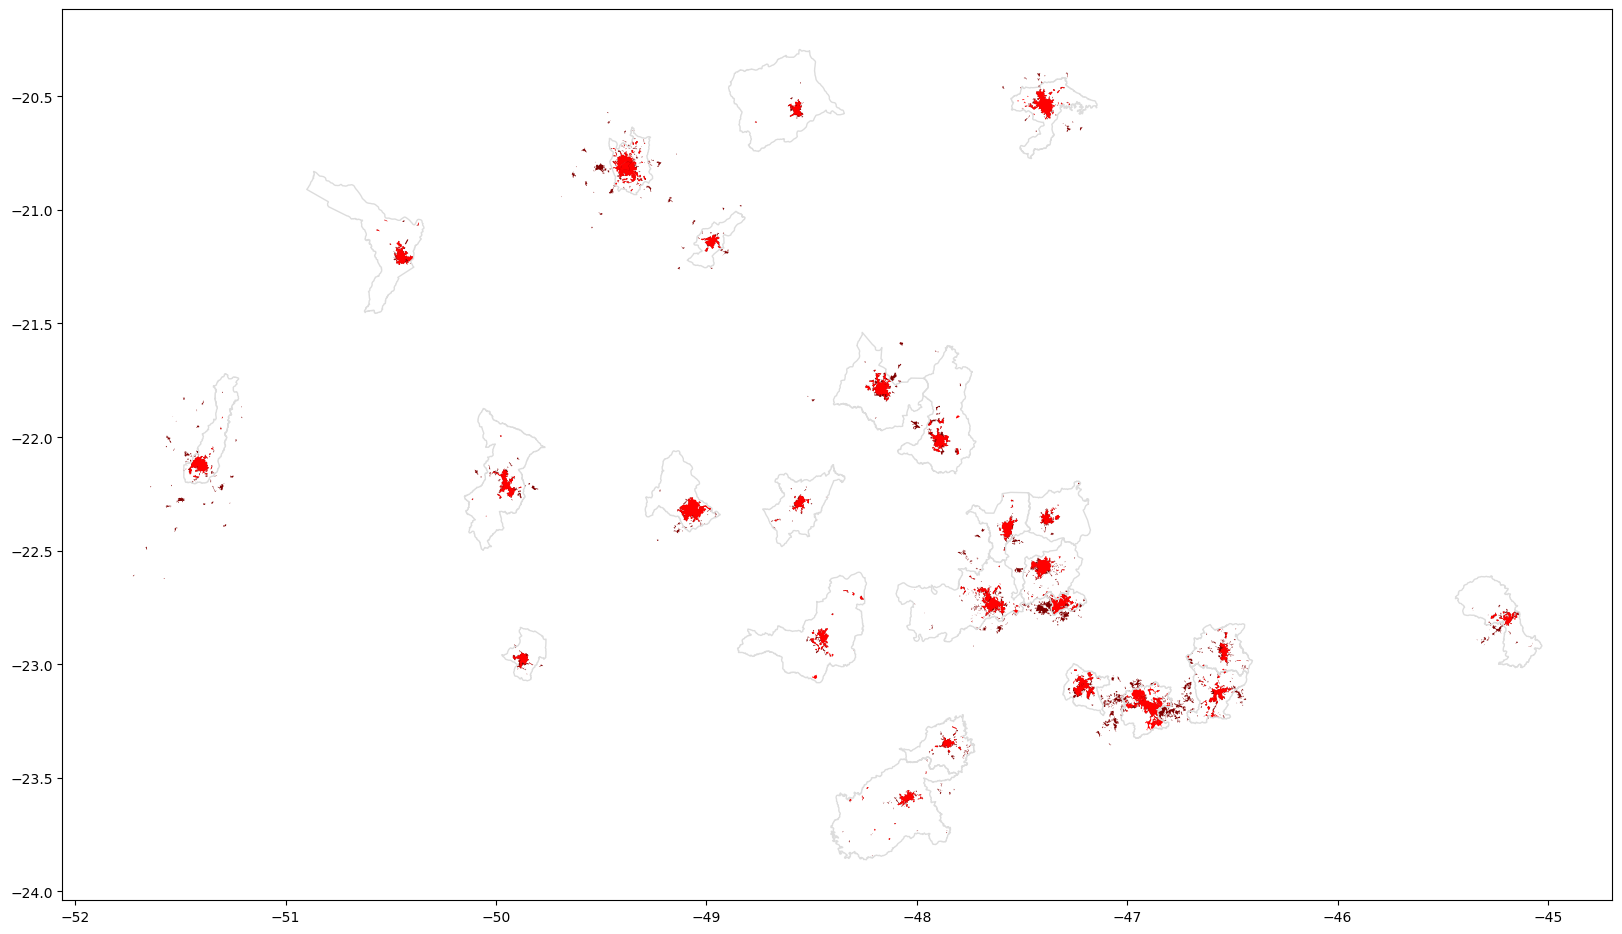

In [47]:
# Define mapa base com limites territoriais dos municípios
ax = munic_sp_2022_cidades.plot(figsize=(20,20), color='none', 
                                 edgecolor='gainsboro', zorder=3)

# Adiciona áreas urbanizadas de 2005 e de 2015 ao mapa base
df2015_25cds_s_vazios.plot(color='maroon', markersize=2, ax=ax) # s/ vazios
df2005_25cidades.plot(color='red', markersize=1, ax=ax); # 25 cidades

### *Manchas urbanizadas (recorte pelos limites territoriais municipais)*

In [48]:
# Cria lista de tuplas contendo os dfs e seus correspondentes novos nomes
dataframes = [
    (df2005_25cidades, 'df2005_25cidades_rec'),
    (df2015_25cds_c_vazios, 'df2015_25cds_c_vazios_rec'),
    (df2015_25cds_s_vazios, 'df2015_25cds_s_vazios_rec')
]

# Itera sobre cada df
for df, df_name in dataframes:
    # recorta manchas urbanizadas conforme limite territorial dos municípios
    result = gpd.overlay(munic_sp_2022_cidades, df, how='intersection', 
                         keep_geom_type=None, make_valid=True)
    
    # remove colunas redundantes e que não serão usadas
    cols_to_drop = ['CD_MUN', 'NM_MUN', 'SIGLA_UF', 'AREA_KM2']
    result.drop(cols_to_drop, axis=1, inplace=True)
    
    # atribui o resultado ao nome do df correspondente, de maneira dinâmica
    globals()[df_name] = result

#### Mapas

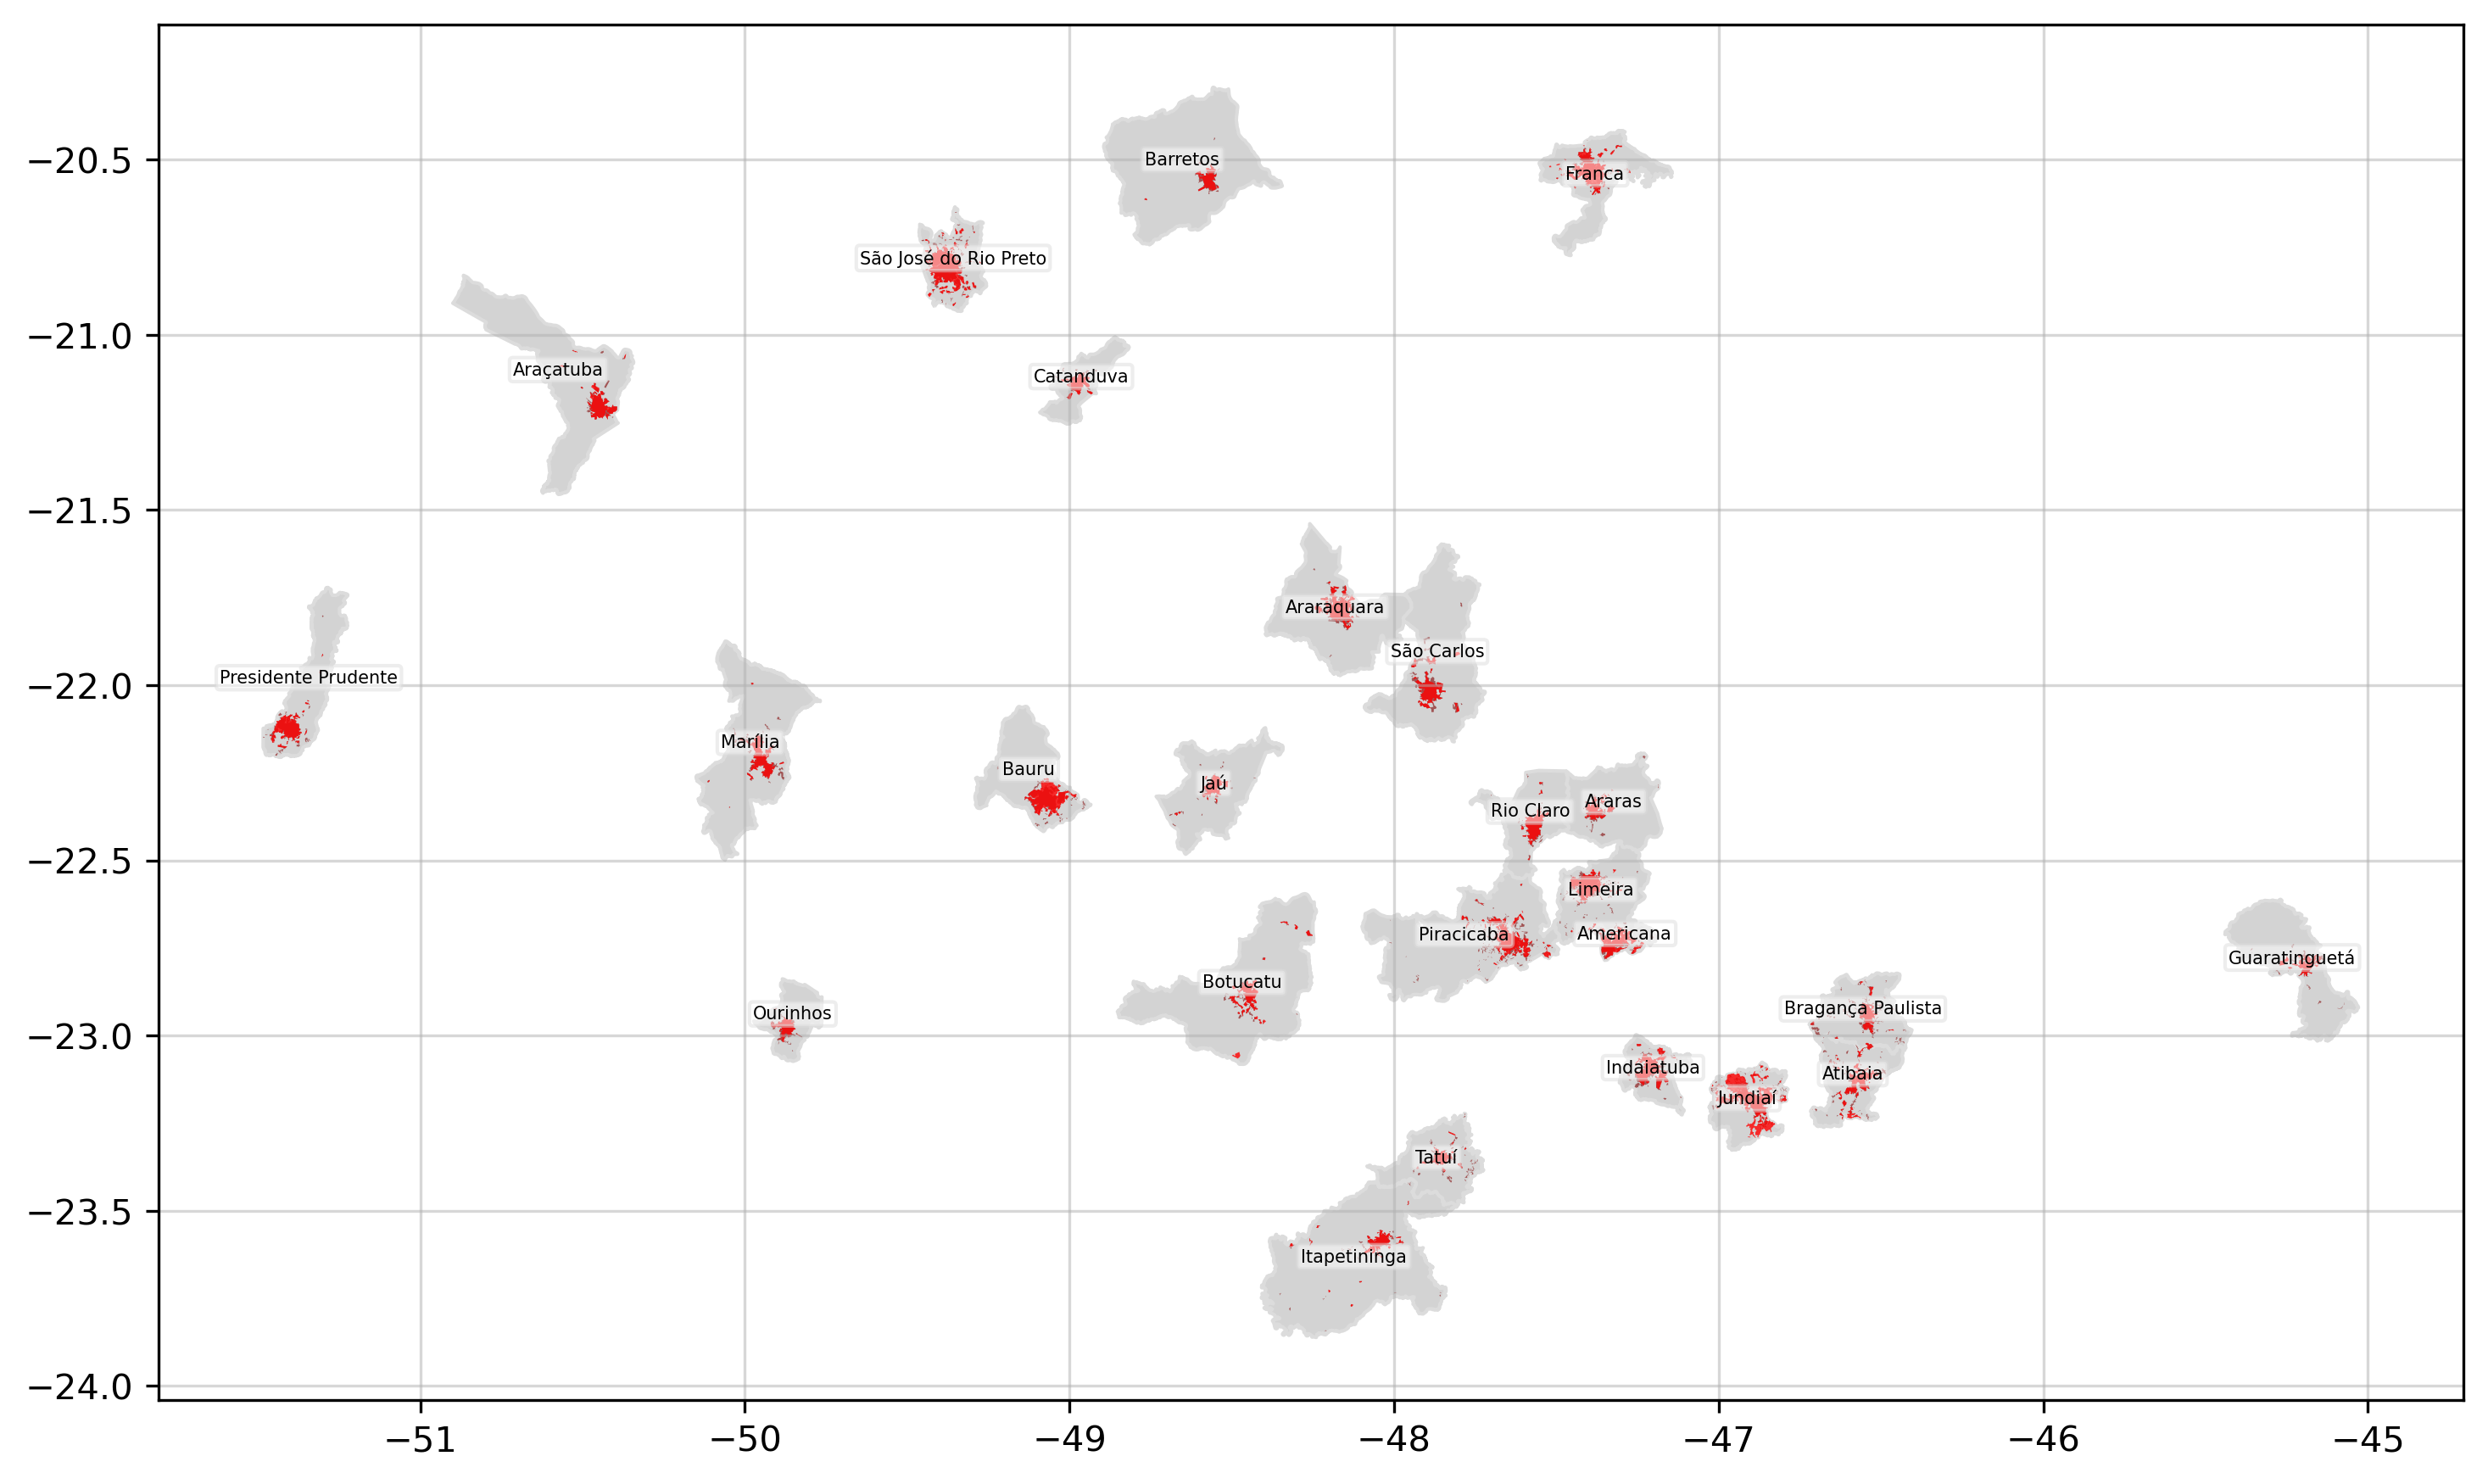

In [49]:
# Define mapa base com limites territoriais dos municípios

# Tamanho da figura compatível com papel A4 (paisagem)
fig, ax = plt.subplots(figsize=(11.69,8.27), dpi=300)

munic_sp_2022_cidades.apply(lambda x: ax.annotate(
    text=x.NM_MUN,
    xy=x.geometry.centroid.coords[0],
    ha='center',
    fontsize=5,
    bbox=dict(facecolor='white', edgecolor='gainsboro', alpha=0.5, boxstyle='round,pad=0.2')
), axis=1)

munic_sp_2022_cidades.plot(color="lightgrey", edgecolor='gainsboro', zorder=1, ax=ax, legend=True)

ax.text(-0.05, 0.5, '', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation=90)

# Adiciona áreas urbanizadas (recortadas) de 2005 e de 2015 ao mapa base
df2015_25cds_s_vazios_rec.plot(color='maroon', alpha=0.6, markersize=2, ax=ax) # s/ vazios
df2005_25cidades_rec.plot(color='red', alpha=0.8, markersize=1, ax=ax) # 25 cidades

ax.grid(alpha=0.5)
plt.show()

In [50]:
# Converte para SIRGAS 2000/UTM zone 23 Sul
munic_sp_2022_cidades.to_crs(31983)
df2015_25cds_s_vazios_rec.to_crs(31983)
df2015_25cds_c_vazios_rec.to_crs(31983)
df2005_25cidades_rec.to_crs(31983)

# Salva arquivos shapefiles
munic_sp_2022_cidades.to_file('mapas/munics2022.shp')
df2015_25cds_c_vazios_rec.to_file('mapas/gdf2015_vazios.shp')
df2015_25cds_s_vazios_rec.to_file('mapas/gdf2015.shp')
df2005_25cidades_rec.to_file('mapas/gdf2005.shp')

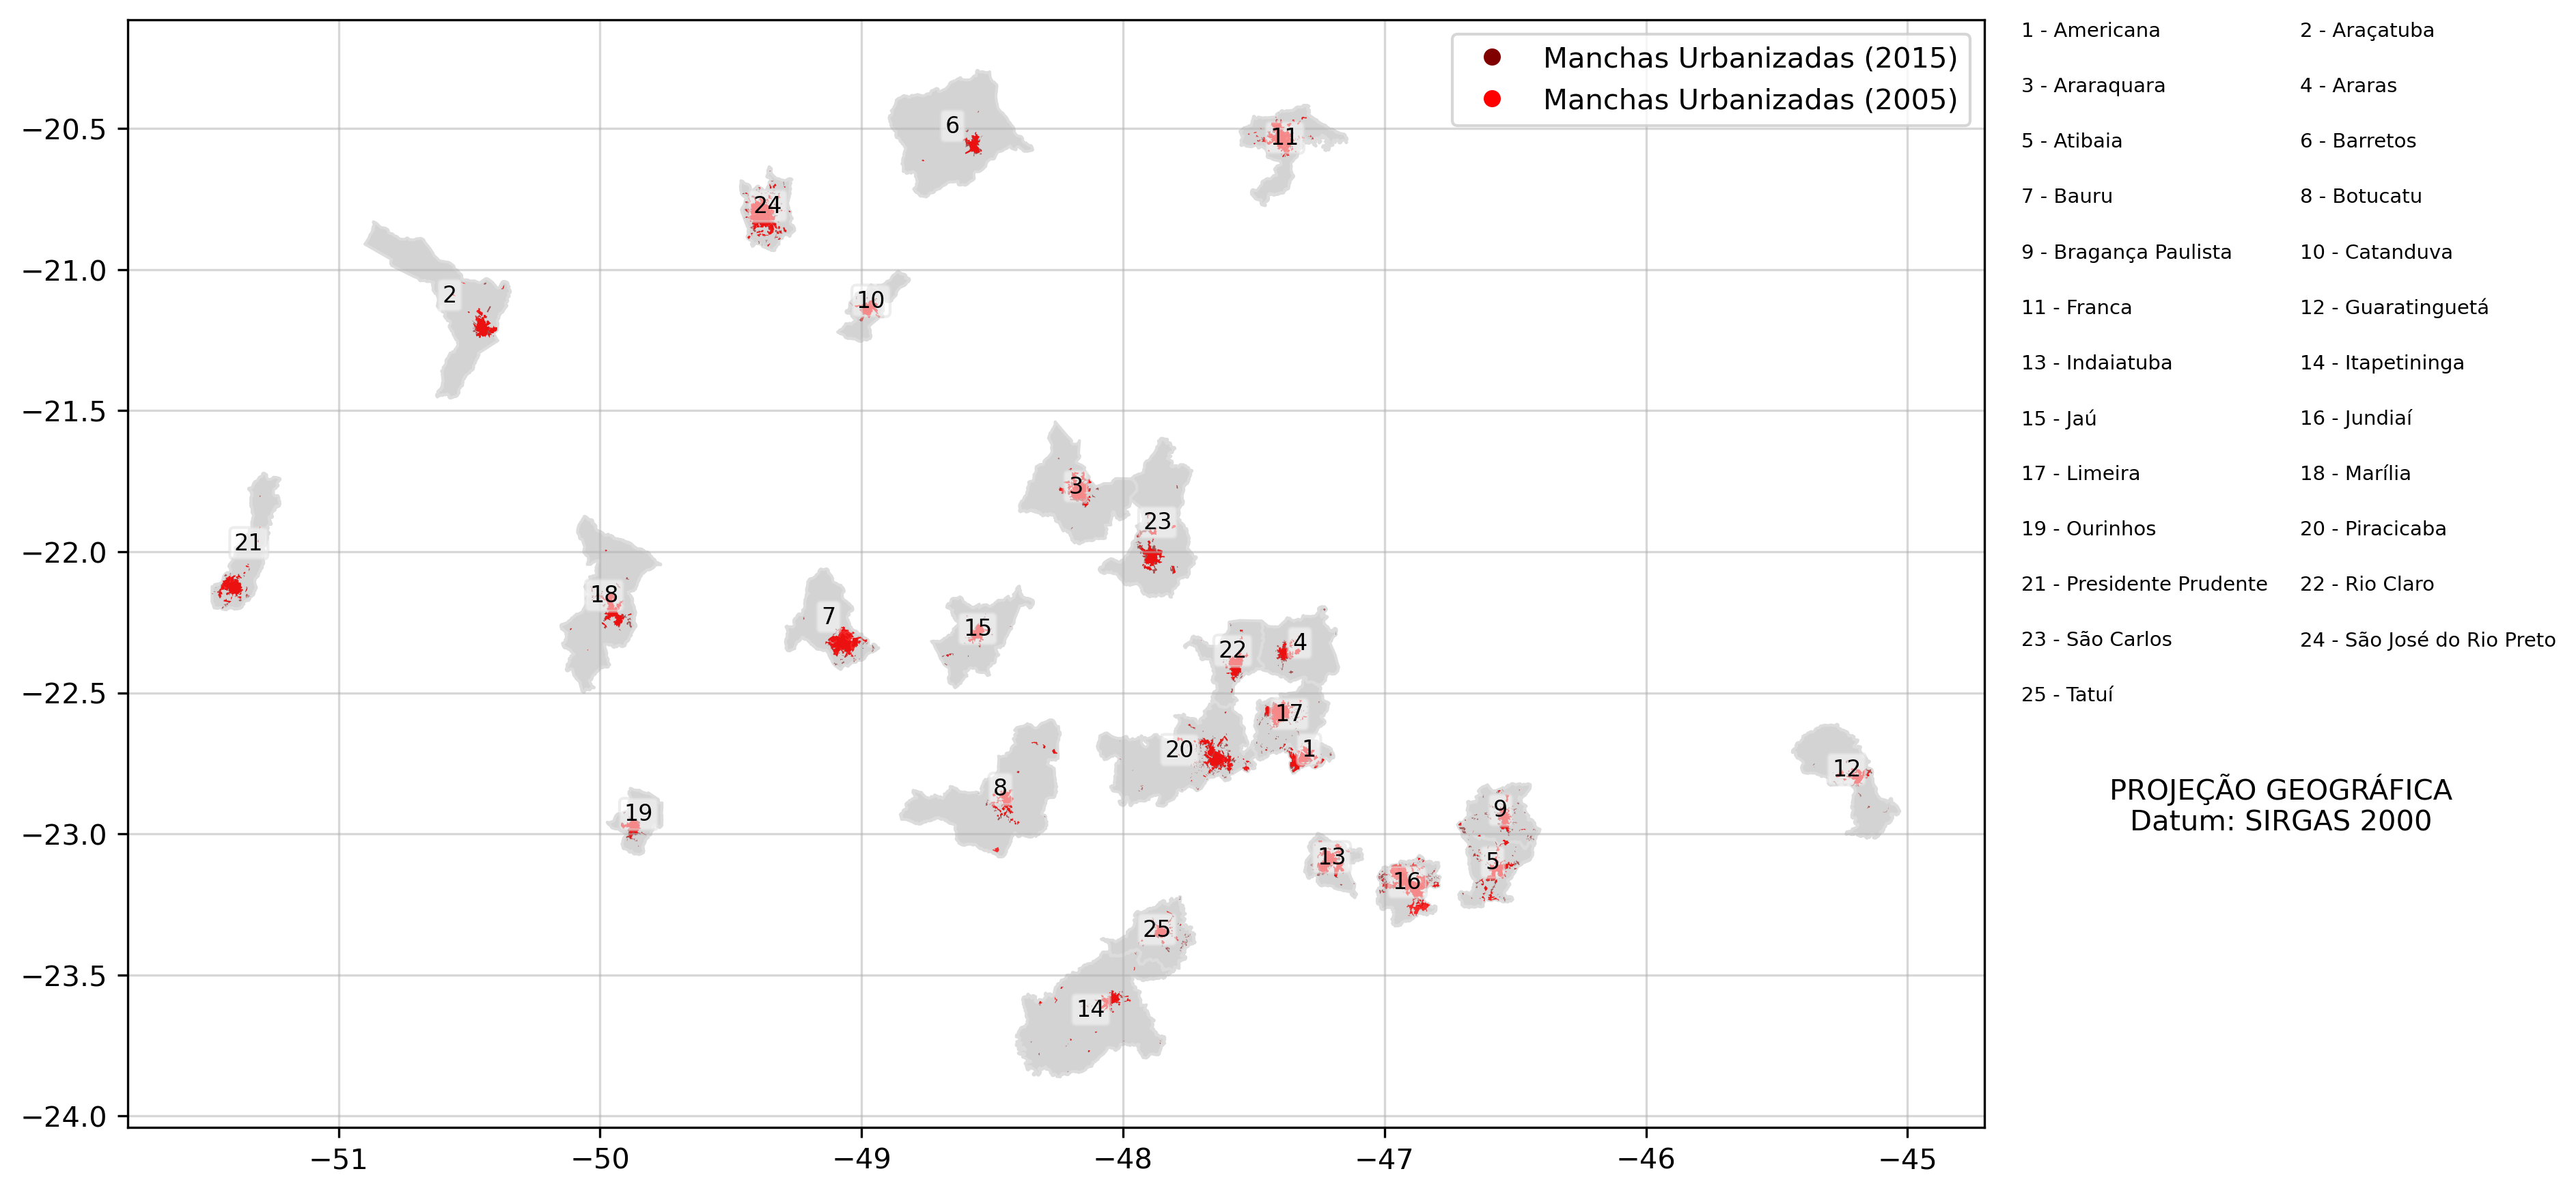

In [51]:
from matplotlib.lines import Line2D

# Define mapa base com limites territoriais dos municípios
legenda = {1: 'Americana', 2: 'Araçatuba', 3: 'Araraquara', 4: 'Araras', 5: 'Atibaia', 
           6: 'Barretos', 7: 'Bauru', 8: 'Botucatu', 9: 'Bragança Paulista', 10: 'Catanduva', 
           11: 'Franca', 12: 'Guaratinguetá', 13: 'Indaiatuba', 14: 'Itapetininga', 15: 'Jaú', 
           16: 'Jundiaí', 17: 'Limeira', 18: 'Marília', 19: 'Ourinhos', 20: 'Piracicaba', 
           21: 'Presidente Prudente', 22: 'Rio Claro', 23: 'São Carlos', 24: 'São José do Rio Preto', 25: 'Tatuí'}

# Tamanho da figura compatível com papel A4 (paisagem)
fig, ax = plt.subplots(figsize=(11.69, 8.27), dpi=300)

index = [1]  # Starting index as a list

def annotate_with_number(row):
    centroid = row.geometry.centroid
    ax.annotate(
        text=str(index[0]),  # Use the number as the annotation text
        xy=(centroid.x, centroid.y),
        ha='center',
        fontsize=8,
        bbox=dict(facecolor='white', edgecolor='gainsboro', alpha=0.5, boxstyle='round,pad=0.2')
    )
    index[0] += 1  # Increment the index value

munic_sp_2022_cidades.apply(annotate_with_number, axis=1)

munic_sp_2022_cidades.plot(color="lightgrey", edgecolor='gainsboro', zorder=1, ax=ax)

# Create legend for numbers and municipality names
legend_y = 0.99  # Adjust the starting position of the legend
num_cities = len(legenda)
num_cols = 2  # Number of columns in the legend
num_rows = int(np.ceil(num_cities / num_cols))  # Number of rows in the legend
col_width = 0.15  # Width of each column in the legend

for i, (city_id, city_name) in enumerate(legenda.items()):
    col = i % num_cols
    row = i // num_cols
    x_pos = 1.02 + col * col_width
    y_pos = legend_y - row * 0.05
    plt.text(x_pos, y_pos, f'{city_id} - {city_name}', transform=ax.transAxes, fontsize=7, ha='left', va='center')
    plt.Rectangle((x_pos + 0.03, y_pos - 0.03), 0.03, 0.03, fc='lightgrey', ec='gainsboro')

# Adiciona áreas urbanizadas (recortadas) de 2005 e de 2015 ao mapa base
s_vazios_rec = df2015_25cds_s_vazios_rec.plot(color='maroon', alpha=0.6, markersize=2, ax=ax)
cidades_rec = df2005_25cidades_rec.plot(color='red', alpha=0.8, markersize=1, ax=ax)

ax.grid(alpha=0.5)

# Add the additional text
plt.text(1.16, 0.32, 'PROJEÇÃO GEOGRÁFICA\nDatum: SIRGAS 2000', transform=ax.transAxes, fontsize=10, ha='center', va='top')

# Create legend manually
legend_elements = [
    Line2D([0], [0], color='maroon', marker='o', linestyle='', markersize=5, label='Manchas Urbanizadas (2015)'),
    Line2D([0], [0], color='red', marker='o', linestyle='', markersize=5, label='Manchas Urbanizadas (2005)')
]
ax.legend(handles=legend_elements)

plt.show()

#### Agrupamentos (com vazios)

In [52]:
# Quantidade de manchas urbanizadas por município
manchas_urb_c_vazios = agrupa(df=df2015_25cds_c_vazios_rec, col_munics='NomConcUrb', 
                              col_areas='AREA_GEO', tipo='quantidade')
manchas_urb_c_vazios

NomConcUrb
Americana                 21
Araraquara                20
Araras                    28
Araçatuba                 18
Atibaia                   61
Barretos                  10
Bauru                     48
Botucatu                  29
Bragança Paulista         45
Catanduva                  9
Franca                    38
Guaratinguetá             30
Indaiatuba                36
Itapetininga              47
Jaú                       23
Jundiaí                   82
Limeira                   73
Marília                   30
Ourinhos                  11
Piracicaba               102
Presidente Prudente       25
Rio Claro                 27
São Carlos                14
São José do Rio Preto    120
Tatuí                     43
Name: AREA_GEO, dtype: int64

In [53]:
# Área das manchas urbanizadas por município (km²)
manchas_urb_area_c_vazios = agrupa(df=df2015_25cds_c_vazios_rec, 
                                   col_munics='NomConcUrb', 
                                   col_areas='AREA_GEO', 
                                   tipo='area')
manchas_urb_area_c_vazios

NomConcUrb
Americana                 87.111613
Araraquara                78.979384
Araras                    34.191601
Araçatuba                 50.612968
Atibaia                   63.111767
Barretos                  32.300678
Bauru                     75.513261
Botucatu                  43.980831
Bragança Paulista         49.652410
Catanduva                 31.359148
Franca                    72.868543
Guaratinguetá             43.248289
Indaiatuba                64.602184
Itapetininga              34.894765
Jaú                       31.930428
Jundiaí                  141.365624
Limeira                   71.254843
Marília                   61.763571
Ourinhos                  32.209064
Piracicaba                98.306677
Presidente Prudente       55.454239
Rio Claro                 45.783828
São Carlos                73.579898
São José do Rio Preto    110.659331
Tatuí                     33.840321
Name: AREA_GEO, dtype: float64

#### Agrupamentos (sem vazios)

In [54]:
# Quantidade de manchas urbanizadas por município
manchas_urb_s_vazios = agrupa(df=df2015_25cds_s_vazios_rec, col_munics='NomConcUrb', 
                              col_areas='AREA_GEO', tipo='quantidade')
manchas_urb_s_vazios

NomConcUrb
Americana                 19
Araraquara                19
Araras                    27
Araçatuba                 17
Atibaia                   61
Barretos                  10
Bauru                     47
Botucatu                  29
Bragança Paulista         45
Catanduva                  9
Franca                    34
Guaratinguetá             29
Indaiatuba                36
Itapetininga              47
Jaú                       22
Jundiaí                   79
Limeira                   70
Marília                   30
Ourinhos                  11
Piracicaba               101
Presidente Prudente       25
Rio Claro                 27
São Carlos                12
São José do Rio Preto    119
Tatuí                     43
Name: AREA_GEO, dtype: int64

In [55]:
# Área das manchas urbanizadas por município (km²)
manchas_urb_area_s_vazios = agrupa(df=df2015_25cds_s_vazios_rec, 
                                   col_munics='NomConcUrb', 
                                   col_areas='AREA_GEO', 
                                   tipo='area')
manchas_urb_area_s_vazios

NomConcUrb
Americana                 85.444330
Araraquara                78.720802
Araras                    33.901431
Araçatuba                 49.881100
Atibaia                   63.111767
Barretos                  32.300678
Bauru                     74.993279
Botucatu                  43.980831
Bragança Paulista         49.652410
Catanduva                 31.359148
Franca                    70.866811
Guaratinguetá             42.031972
Indaiatuba                64.602184
Itapetininga              34.894765
Jaú                       31.636597
Jundiaí                  139.504346
Limeira                   70.082755
Marília                   61.763571
Ourinhos                  32.209064
Piracicaba                97.739711
Presidente Prudente       55.454239
Rio Claro                 45.783828
São Carlos                71.292473
São José do Rio Preto    108.546133
Tatuí                     33.840321
Name: AREA_GEO, dtype: float64

### *Pop. urbana e rural*

#### 2005

In [56]:
# Filtra apenas cidades paulistas dentre as 25 listadas
pop_urb_rur2005_25cds = pop_urb_rur[(pop_urb_rur['municipio'].isin(cidades_2015)) & (pop_urb_rur['ano'] == 2005)].copy()

# Exibe 5 primeiras linhas
pop_urb_rur2005_25cds.head()

,cod_ibge,municipio,ano,pop_urb,pop_rur,pop_tot,grau_urb
663,3501608,Americana,2005,196188,650,196838,"99,67"
676,3502804,Araçatuba,2005,170982,4847,175829,"97,24"
681,3503208,Araraquara,2005,187106,8222,195328,"95,79"
682,3503307,Araras,2005,104746,6559,111305,"94,11"
692,3504107,Atibaia,2005,105384,13958,119342,"88,3"


In [57]:
# Dimensionalidade
pop_urb_rur2005_25cds.shape

(25, 7)

#### 2015

In [58]:
# Filtra apenas cidades paulistas dentre as 25 listadas
pop_urb_rur2015_25cds = pop_urb_rur[(pop_urb_rur['municipio'].isin(cidades_2015)) & (pop_urb_rur['ano'] == 2015)].copy()

# Exibe 5 primeiras linhas
pop_urb_rur2015_25cds.head()

,cod_ibge,municipio,ano,pop_urb,pop_rur,pop_tot,grau_urb
1953,3501608,Americana,2015,222118,1042,223160,"99,53"
1966,3502804,Araçatuba,2015,182935,3598,186533,"98,07"
1971,3503208,Araraquara,2015,213387,6244,219631,"97,16"
1972,3503307,Araras,2015,118829,6356,125185,"94,92"
1982,3504107,Atibaia,2015,123405,10037,133442,"92,48"


In [59]:
# Dimensionalidade
pop_urb_rur2015_25cds.shape

(25, 7)

#### 2005 e 2015

In [60]:
# Concatena populações de 2005 e 2015
pop_urb_rur_25cds = pd.concat([pop_urb_rur2005_25cds, pop_urb_rur2015_25cds])

# Exibe 5 primeiras linhas
pop_urb_rur_25cds.head()

,cod_ibge,municipio,ano,pop_urb,pop_rur,pop_tot,grau_urb
663,3501608,Americana,2005,196188,650,196838,"99,67"
676,3502804,Araçatuba,2005,170982,4847,175829,"97,24"
681,3503208,Araraquara,2005,187106,8222,195328,"95,79"
682,3503307,Araras,2005,104746,6559,111305,"94,11"
692,3504107,Atibaia,2005,105384,13958,119342,"88,3"


In [61]:
# A função pivot() pega o DataFrame original e cria um novo, com a coluna 
# 'ano' como cabeçalho, a coluna 'municipio' como índice e os valores da coluna 
# 'pop_tot'como valor de célula
pops_tot = pop_urb_rur_25cds.pivot(index='municipio', columns='ano')['pop_tot'].reset_index()

# Nomeia colunas após pivotamento
pops_tot.columns = ['Municipio', 'Pop_tot_2005', 'Pop_tot_2015']

# Exibe novo DataFrame
pops_tot

,Municipio,Pop_tot_2005,Pop_tot_2015
0,Americana,196838,223160
1,Araraquara,195328,219631
2,Araras,111305,125185
3,Araçatuba,175829,186533
4,Atibaia,119342,133442
5,Barretos,107919,115378
6,Bauru,330750,354928
7,Botucatu,117775,134858
8,Bragança Paulista,136080,156241
9,Catanduva,109368,115288


In [62]:
# Área das manchas urbanizadas por município (2005)
areas2005 = df2005_25cidades_rec.groupby('NOME_MUNIC')['Area_Km2'].sum()
areas2005

NOME_MUNIC
Americana                 92.86
Araraquara                60.72
Araras                    26.84
Araçatuba                 46.78
Atibaia                   54.03
Barretos                  26.34
Bauru                     84.15
Botucatu                  44.00
Bragança Paulista         31.00
Catanduva                 29.36
Franca                    81.14
Guaratinguetá             26.04
Indaiatuba                56.60
Itapetininga              32.79
Jaú                       26.66
Jundiaí                  134.73
Limeira                   57.76
Marília                   50.42
Ourinhos                  24.06
Piracicaba                78.81
Presidente Prudente       51.47
Rio Claro                 38.42
São Carlos                52.86
São José do Rio Preto    110.04
Tatuí                     22.22
Name: Area_Km2, dtype: float64

In [63]:
# Área das manchas urbanizadas por município (2015)
areas2015 = df2015_25cds_s_vazios_rec.groupby('NomConcUrb')['AREA_GEO'].sum()
areas2015

NomConcUrb
Americana                 85.444330
Araraquara                78.720802
Araras                    33.901431
Araçatuba                 49.881100
Atibaia                   63.111767
Barretos                  32.300678
Bauru                     74.993279
Botucatu                  43.980831
Bragança Paulista         49.652410
Catanduva                 31.359148
Franca                    70.866811
Guaratinguetá             42.031972
Indaiatuba                64.602184
Itapetininga              34.894765
Jaú                       31.636597
Jundiaí                  139.504346
Limeira                   70.082755
Marília                   61.763571
Ourinhos                  32.209064
Piracicaba                97.739711
Presidente Prudente       55.454239
Rio Claro                 45.783828
São Carlos                71.292473
São José do Rio Preto    108.546133
Tatuí                     33.840321
Name: AREA_GEO, dtype: float64

In [64]:
# Combina duas Séries em um mesmo DataFrame
areas_manchas_urb = areas2005.to_frame().join(round(areas2015, 2)).reset_index()

# Nomeia colunas
areas_manchas_urb.columns = ['Municipio', 'Area_2005', 'Area_2015']

# Exibe novo DataFrame
areas_manchas_urb

,Municipio,Area_2005,Area_2015
0,Americana,92.86,85.44
1,Araraquara,60.72,78.72
2,Araras,26.84,33.90
3,Araçatuba,46.78,49.88
4,Atibaia,54.03,63.11
5,Barretos,26.34,32.30
6,Bauru,84.15,74.99
7,Botucatu,44.00,43.98
8,Bragança Paulista,31.00,49.65
9,Catanduva,29.36,31.36


In [65]:
# Une DataFrames
df_tgca = pd.merge(pops_tot, areas_manchas_urb, on = 'Municipio')
df_tgca

,Municipio,Pop_tot_2005,Pop_tot_2015,Area_2005,Area_2015
0,Americana,196838,223160,92.86,85.44
1,Araraquara,195328,219631,60.72,78.72
2,Araras,111305,125185,26.84,33.90
3,Araçatuba,175829,186533,46.78,49.88
4,Atibaia,119342,133442,54.03,63.11
5,Barretos,107919,115378,26.34,32.30
6,Bauru,330750,354928,84.15,74.99
7,Botucatu,117775,134858,44.00,43.98
8,Bragança Paulista,136080,156241,31.00,49.65
9,Catanduva,109368,115288,29.36,31.36


## **Análise Exploratória dos Dados**

### **Vizinho mais Próximo**

In [66]:
# Carrega base de dados com ANNI
anni = pd.read_csv('dados/ANNI.csv')

# Exibe DataFrame completo
anni

,municipio,R_2005,z_score_2005,R_2015,z_score_2015
0,Americana,1.932418,4.369355,1.273726,2.282568
1,Araçatuba,1.629783,3.187651,0.965357,-0.273257
2,Araraquara,1.851707,3.991140,1.157055,1.309663
3,Araras,1.529715,2.866276,0.782872,-2.158380
4,Atibaia,0.839396,-1.843483,1.025246,0.377214
5,Barretos,2.068355,4.087677,1.490652,2.968275
6,Bauru,inf,inf,0.798128,-2.647620
7,Botucatu,0.837058,-1.428482,0.789062,-2.173123
8,Bragança Paulista,1.076614,0.486108,1.072777,0.933968
9,Catanduva,3.240842,7.425107,2.106580,6.350898


In [67]:
# Substitui 'inf' por zero (random), pois um índice de 0 significa 
# que todos os pontos estão exatamente no mesmo lugar, caso de Bauru,
# que possuía apenas uma mancha urbana em 2005
anni['R_2005'].replace(to_replace=float('inf'), value=0, inplace=True)
anni['z_score_2005'].replace(to_replace=float('inf'), value=0, inplace=True)

# Exibe DataFrame completo
anni

,municipio,R_2005,z_score_2005,R_2015,z_score_2015
0,Americana,1.932418,4.369355,1.273726,2.282568
1,Araçatuba,1.629783,3.187651,0.965357,-0.273257
2,Araraquara,1.851707,3.991140,1.157055,1.309663
3,Araras,1.529715,2.866276,0.782872,-2.158380
4,Atibaia,0.839396,-1.843483,1.025246,0.377214
5,Barretos,2.068355,4.087677,1.490652,2.968275
6,Bauru,0.000000,0.000000,0.798128,-2.647620
7,Botucatu,0.837058,-1.428482,0.789062,-2.173123
8,Bragança Paulista,1.076614,0.486108,1.072777,0.933968
9,Catanduva,3.240842,7.425107,2.106580,6.350898


In [68]:
# Interpretação dos valores do índice R, com base no z-score

def classifica(col_index, col_z_score):
    
    """
    Classifica o índice R, que representa a razão média do vizinho mais 
    próximo (average nearest neighbor ratio), considerando o z-score:
    Se o índice for menor que 1, o padrão será de agrupamento (clustering).
    Se o índice for igual a 1, o padrão será aleatório (random)
    Se o índice for maior do que 1, o padrão será de dispersão (dispersion).
    """
    
    padrao = []
    
    for index, z_score in zip(anni[col_index], anni[col_z_score]):
        if index == 0 or (-1.96 < z_score < 1.96):
            padrao.append('Aleatório')
        elif index < 1 and (z_score < -1.96 or z_score > 1.96):
            padrao.append('Agrupamento')
        elif index > 1 and (z_score < -1.96 or z_score > 1.96):
            padrao.append('Dispersão')
        else:
            padrao.append('Sem padrão definido')

    return padrao

# Cria coluna com a interpretação dos índices R para cada ano, considerando o valor do z-score
anni['Padrão_2005'] = classifica(col_index='R_2005', col_z_score='z_score_2005')
anni['Padrão_2015'] = classifica(col_index='R_2015', col_z_score='z_score_2015')

# # Insere nova coluna com variação percentual do índice R entre períodos
# anni['variacao_R_%'] = ((anni['R_2015'] - anni['R_2005']) / anni['R_2005']) * 100

# Exibe DataFrame completo
anni

,municipio,R_2005,z_score_2005,R_2015,z_score_2015,Padrão_2005,Padrão_2015
0,Americana,1.932418,4.369355,1.273726,2.282568,Dispersão,Dispersão
1,Araçatuba,1.629783,3.187651,0.965357,-0.273257,Dispersão,Aleatório
2,Araraquara,1.851707,3.991140,1.157055,1.309663,Dispersão,Aleatório
3,Araras,1.529715,2.866276,0.782872,-2.158380,Dispersão,Agrupamento
4,Atibaia,0.839396,-1.843483,1.025246,0.377214,Aleatório,Aleatório
5,Barretos,2.068355,4.087677,1.490652,2.968275,Dispersão,Dispersão
6,Bauru,0.000000,0.000000,0.798128,-2.647620,Aleatório,Agrupamento
7,Botucatu,0.837058,-1.428482,0.789062,-2.173123,Aleatório,Agrupamento
8,Bragança Paulista,1.076614,0.486108,1.072777,0.933968,Aleatório,Aleatório
9,Catanduva,3.240842,7.425107,2.106580,6.350898,Dispersão,Dispersão


In [69]:
# Salva tabelas no formato csv
anni.to_csv('tabelas/padroes_anni.csv', index=False)

In [70]:
# Descrição das variáveis numéricas
descr_anni = anni.describe()
descr_anni

,R_2005,z_score_2005,R_2015,z_score_2015
count,25.000000,25.000000,25.000000,25.000000
mean,1.493328,2.172750,0.986539,-0.800684
std,0.861429,2.641188,0.322000,2.718511
min,0.000000,-1.843483,0.590181,-5.418752
25%,1.021000,0.259201,0.789062,-2.749272
50%,1.272613,2.364110,0.929454,-0.818749
75%,1.654887,3.314718,1.106728,0.933968
max,4.438169,9.301932,2.106580,6.350898


In [71]:
# Salva tabela no formato csv
descr_anni.to_csv('tabelas/descricao_anni.csv')

### **TGCA**

#### Tabelas

In [72]:
# Insere novas colunas para densidade urbana
df_tgca['Dens_urb_2005'] = round(df_tgca['Pop_tot_2005']/df_tgca['Area_2005'], 2)
df_tgca['Dens_urb_2015'] = round(df_tgca['Pop_tot_2015']/df_tgca['Area_2015'], 2)

# Cálculo da TGCA

def compara_periodos(col_inicial, col_final, n=int(2015-2005)):

    """Calcula a Taxa Geométrica de Crescimento Anual - TGCA"""
    
    # fórumula: ((valor final/valor inicial)**(1/n))-1)*100
    tgca = ((df_tgca[col_final]/df_tgca[col_inicial])**(1/n)-1)*100
    
    return round(tgca, 2)

# Cria novas colunas para TGCAs
df_tgca['TGCA_pop_%'] = compara_periodos(col_inicial='Pop_tot_2005', col_final='Pop_tot_2015')
df_tgca['TGCA_area_%'] = compara_periodos(col_inicial='Area_2005', col_final='Area_2015')
df_tgca['TGCA_dens_%'] = compara_periodos(col_inicial='Dens_urb_2005', col_final='Dens_urb_2015')

# Exibe DataFrame completo
df_tgca

,Municipio,Pop_tot_2005,Pop_tot_2015,Area_2005,Area_2015,Dens_urb_2005,Dens_urb_2015,TGCA_pop_%,TGCA_area_%,TGCA_dens_%
0,Americana,196838,223160,92.86,85.44,2119.73,2611.89,1.26,-0.83,2.11
1,Araraquara,195328,219631,60.72,78.72,3216.86,2790.03,1.18,2.63,-1.41
2,Araras,111305,125185,26.84,33.90,4146.98,3692.77,1.18,2.36,-1.15
3,Araçatuba,175829,186533,46.78,49.88,3758.64,3739.64,0.59,0.64,-0.05
4,Atibaia,119342,133442,54.03,63.11,2208.81,2114.44,1.12,1.57,-0.44
5,Barretos,107919,115378,26.34,32.30,4097.15,3572.07,0.67,2.06,-1.36
6,Bauru,330750,354928,84.15,74.99,3930.48,4733.00,0.71,-1.15,1.88
7,Botucatu,117775,134858,44.00,43.98,2676.70,3066.35,1.36,-0.00,1.37
8,Bragança Paulista,136080,156241,31.00,49.65,4389.68,3146.85,1.39,4.82,-3.27
9,Catanduva,109368,115288,29.36,31.36,3725.07,3676.28,0.53,0.66,-0.13


In [73]:
# Descrição das variáveis numéricas
descr = df_tgca.describe()
descr

,Pop_tot_2005,Pop_tot_2015,Area_2005,Area_2015,Dens_urb_2005,Dens_urb_2015,TGCA_pop_%,TGCA_area_%,TGCA_dens_%
count,25.000000,25.00000,25.000000,25.00000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,190946.920000,212136.64000,53.604000,60.14240,3763.451600,3571.332800,1.06360,1.568400,-0.469600
std,88817.110488,97849.59345,29.176842,27.29227,729.640636,664.275393,0.42675,1.681107,1.679907
min,98655.000000,106909.00000,22.220000,31.36000,2119.730000,2114.440000,0.53000,-1.340000,-4.080000
25%,117775.000000,133442.00000,29.360000,34.89000,3482.200000,3146.850000,0.80000,0.620000,-1.360000
50%,175829.000000,194087.00000,50.420000,55.45000,3930.480000,3637.260000,1.12000,1.730000,-0.440000
75%,207445.000000,233249.00000,60.720000,71.29000,4167.050000,3964.180000,1.21000,2.360000,0.860000
max,383181.000000,430312.00000,134.730000,139.50000,4608.720000,4733.000000,2.66000,4.900000,2.240000


In [74]:
# Cálculo das medidas de dispersão para comparação de conjuntos de dados

def medidas_comparativas_dispersao(cols):

    """
    Calcula Coeficiente de Variação - CV, 
    Intervalo Interquartílico - IQR e 
    Coeficiente de Dispersão Quartil - QCD
    """

    # período analisado
    anos = ['2005', '2015']
    
    # lista vazia para armazenar resultados
    resultados = []

    # itera sobre pares coluna:variável do dicionário informado como parâmetro da função
    for col, var in cols.items():

        # para cada ano do período
        for ano in anos:
            # dispersão dos dados em torno da média (sem unidades)
            cv = descr.loc['std', f'{col}_{ano}'] / descr.loc['mean', f'{col}_{ano}']
            # distância entre o 3º e o 1º quartis
            iqr = descr.loc['75%', f'{col}_{ano}'] - descr.loc['25%', f'{col}_{ano}']
            # dispersão dos dados em torno da mediana (sem unidades)
            qcd = (iqr) / (descr.loc['75%', f'{col}_{ano}'] + descr.loc['25%', f'{col}_{ano}'])
            resultado = {'Variável': f'{var} {ano}', 'CV': cv, 'QCD': qcd}
            # adiciona resultados à lista vazia criada
            resultados.append(resultado)

    # retorna um novo df com os resultados como colunas e as variáveis como índices
    return pd.DataFrame(resultados).set_index('Variável')

# Aplica função
column_vars = {
    'Pop_tot': 'População total',
    'Area': 'Áreas urbanizadas',
    'Dens_urb': 'Densidade urbana'
}

dispersao_comparativa = medidas_comparativas_dispersao(column_vars)
dispersao_comparativa

,CV,QCD
Variável,,
População total 2005,0.465140,0.275721
População total 2015,0.461257,0.272183
Áreas urbanizadas 2005,0.544303,0.348135
Áreas urbanizadas 2015,0.453794,0.342814
Densidade urbana 2005,0.193875,0.089532
Densidade urbana 2015,0.186002,0.114938


In [75]:
# Salva tabelas no formato csv
df_tgca.to_csv('tabelas/munics_amostra.csv', index=False)
descr.to_csv('tabelas/descricao.csv')
dispersao_comparativa.to_csv('tabelas/dispersao_comparativa.csv')

#### Figuras

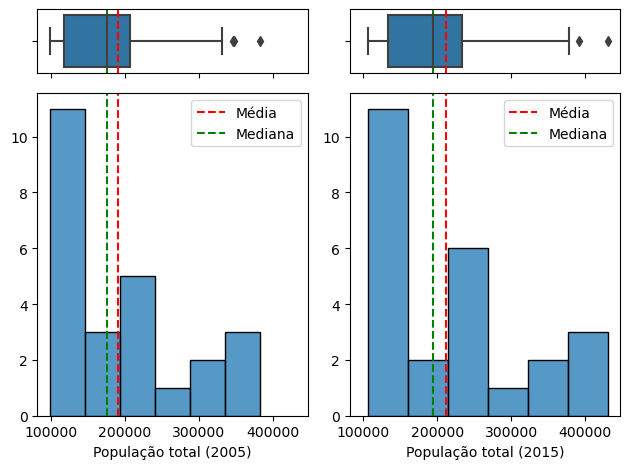

In [76]:
# Boxplots e histogramas da População urbana (2005 e 2015)
box_hist_kde(col_esq='Pop_tot_2005', x_label_esq='População total (2005)', 
         col_dir='Pop_tot_2015', x_label_dir='População total (2015)', plot_abaixo='histograma')

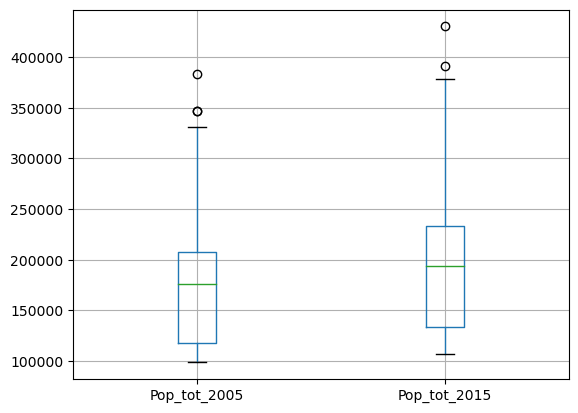

In [77]:
# Boxplots da População urbana (2005 e 2015)
df_tgca[['Pop_tot_2005', 'Pop_tot_2015']].boxplot();

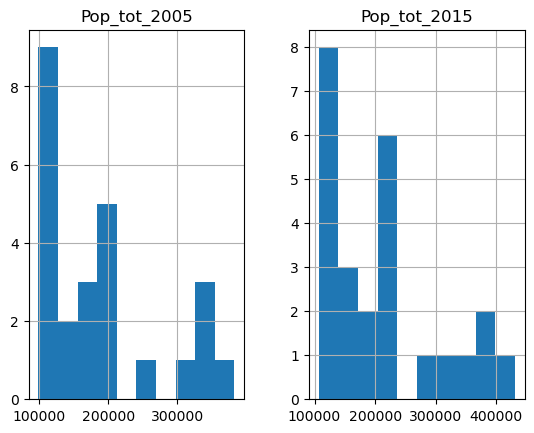

In [78]:
# Histogramas da População urbana (2005 e 2015)
df_tgca[['Pop_tot_2005', 'Pop_tot_2015']].hist();

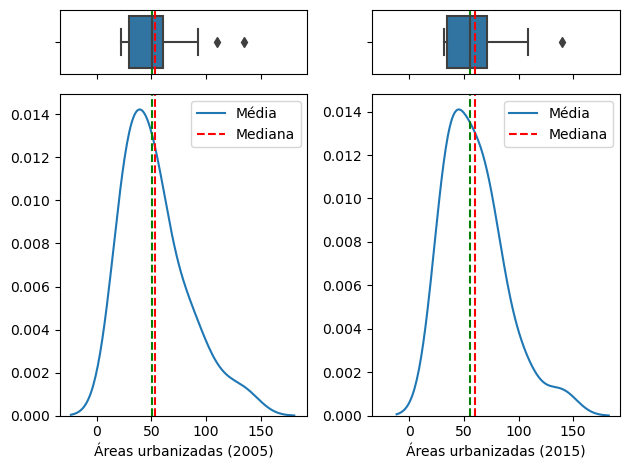

In [79]:
# Boxplots e KDEs das Áreas urbanizadas (2005 e 2015)
box_hist_kde(col_esq='Area_2005', x_label_esq='Áreas urbanizadas (2005)', 
         col_dir='Area_2015', x_label_dir='Áreas urbanizadas (2015)', plot_abaixo='kde')

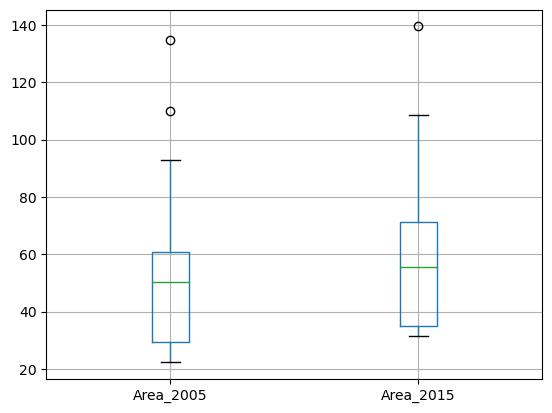

In [80]:
# Boxplots das Áreas urbanizadas (2005 e 2015)
df_tgca[['Area_2005', 'Area_2015']].boxplot();

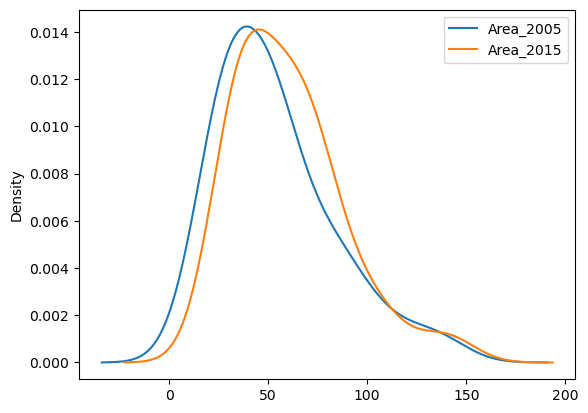

In [81]:
# KDEs das Áreas urbanizadas (2005 e 2015)
df_tgca[['Area_2005', 'Area_2015']].plot(kind='kde');

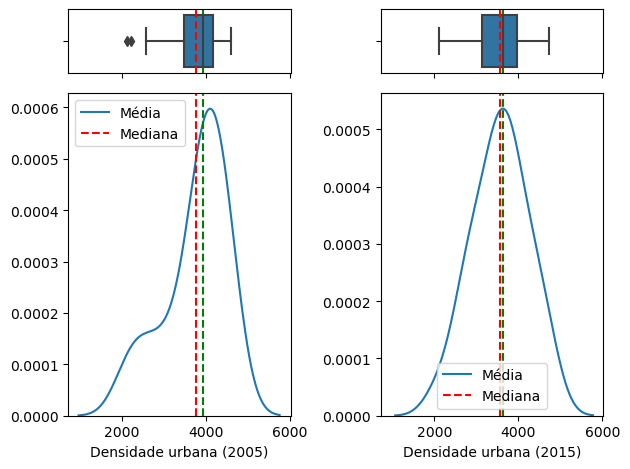

In [82]:
# Boxplots e KDEs da Densidade urbana (2005 e 2015)
box_hist_kde(col_esq='Dens_urb_2005', x_label_esq='Densidade urbana (2005)', 
         col_dir='Dens_urb_2015', x_label_dir='Densidade urbana (2015)', plot_abaixo='kde')

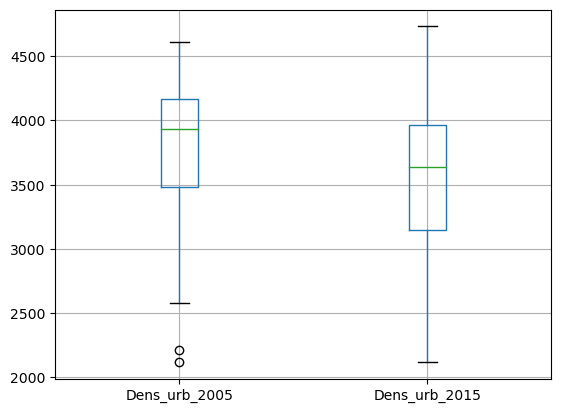

In [83]:
# Boxplots da Densidade urbana (2005 e 2015)
df_tgca[['Dens_urb_2005', 'Dens_urb_2015']].boxplot();

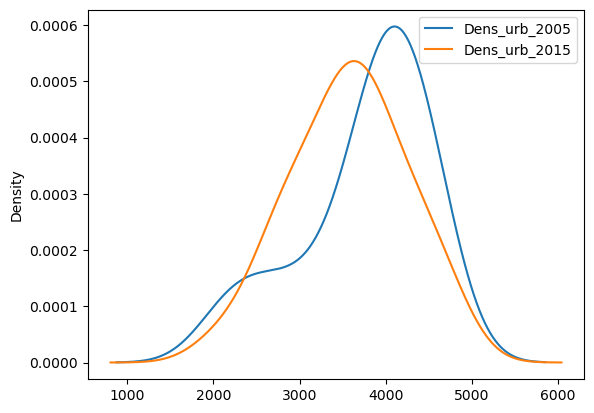

In [84]:
# Histogramas da Densidade urbana (2005 e 2015)
df_tgca[['Dens_urb_2005', 'Dens_urb_2015']].plot(kind='kde');

---

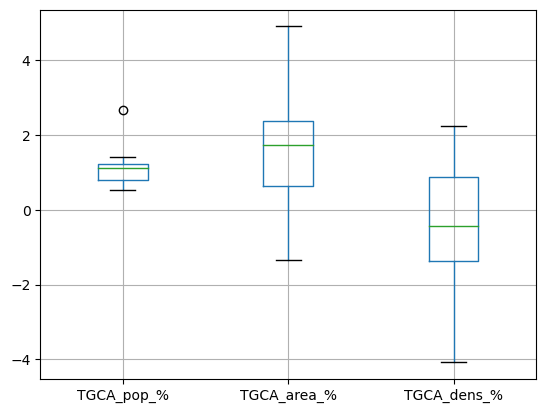

In [85]:
# Boxplot das TGCAs (2005-2015)
df_tgca[['TGCA_pop_%', 'TGCA_area_%', 'TGCA_dens_%']].boxplot();

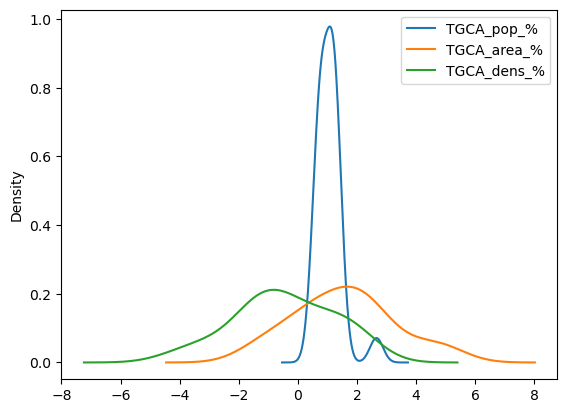

In [86]:
# KDE das TGCAs (2005-2015)
df_tgca[['TGCA_pop_%', 'TGCA_area_%', 'TGCA_dens_%']].plot(kind='kde');

### **Vazios intraurbanos (2015)**

In [87]:
# Quantidade de vazios urbanos por município
manchas_vazios = manchas_urb_c_vazios - manchas_urb_s_vazios
manchas_vazios.sort_values(ascending=False)

NomConcUrb
Franca                   4
Limeira                  3
Jundiaí                  3
São Carlos               2
Americana                2
São José do Rio Preto    1
Bauru                    1
Piracicaba               1
Araçatuba                1
Guaratinguetá            1
Araraquara               1
Jaú                      1
Araras                   1
Rio Claro                0
Marília                  0
Ourinhos                 0
Presidente Prudente      0
Indaiatuba               0
Itapetininga             0
Catanduva                0
Bragança Paulista        0
Botucatu                 0
Barretos                 0
Atibaia                  0
Tatuí                    0
Name: AREA_GEO, dtype: int64

In [88]:
# Proporção da quantidade de vazios por manchas urbanizadas para cada município
manchas_vazios_pond = manchas_vazios/manchas_urb_s_vazios
manchas_vazios_pond.sort_values(ascending=False)

NomConcUrb
São Carlos               0.166667
Franca                   0.117647
Americana                0.105263
Araçatuba                0.058824
Araraquara               0.052632
Jaú                      0.045455
Limeira                  0.042857
Jundiaí                  0.037975
Araras                   0.037037
Guaratinguetá            0.034483
Bauru                    0.021277
Piracicaba               0.009901
São José do Rio Preto    0.008403
Rio Claro                0.000000
Marília                  0.000000
Ourinhos                 0.000000
Presidente Prudente      0.000000
Indaiatuba               0.000000
Itapetininga             0.000000
Catanduva                0.000000
Bragança Paulista        0.000000
Botucatu                 0.000000
Barretos                 0.000000
Atibaia                  0.000000
Tatuí                    0.000000
Name: AREA_GEO, dtype: float64

In [89]:
# Área dos vazios urbanos por município
manchas_area_vazios = manchas_urb_area_c_vazios - manchas_urb_area_s_vazios
manchas_area_vazios.sort_values(ascending=False)

NomConcUrb
São Carlos               2.287425e+00
São José do Rio Preto    2.113198e+00
Franca                   2.001732e+00
Jundiaí                  1.861278e+00
Americana                1.667282e+00
Guaratinguetá            1.216317e+00
Limeira                  1.172088e+00
Araçatuba                7.318677e-01
Piracicaba               5.669660e-01
Bauru                    5.199825e-01
Jaú                      2.938306e-01
Araras                   2.901703e-01
Araraquara               2.585816e-01
Marília                  7.105427e-15
Bragança Paulista        7.105427e-15
Ourinhos                 0.000000e+00
Rio Claro                0.000000e+00
Presidente Prudente      0.000000e+00
Indaiatuba               0.000000e+00
Itapetininga             0.000000e+00
Catanduva                0.000000e+00
Botucatu                 0.000000e+00
Barretos                 0.000000e+00
Atibaia                  0.000000e+00
Tatuí                    0.000000e+00
Name: AREA_GEO, dtype: float64

In [90]:
# Proporção da área dos vazios por manchas urbanizadas para cada município
manchas_area_vazios_pond = manchas_area_vazios/manchas_urb_area_s_vazios
manchas_area_vazios_pond.sort_values(ascending=False)

NomConcUrb
São Carlos               3.208508e-02
Guaratinguetá            2.893791e-02
Franca                   2.824640e-02
Americana                1.951308e-02
São José do Rio Preto    1.946820e-02
Limeira                  1.672434e-02
Araçatuba                1.467224e-02
Jundiaí                  1.334208e-02
Jaú                      9.287681e-03
Araras                   8.559235e-03
Bauru                    6.933722e-03
Piracicaba               5.800774e-03
Araraquara               3.284794e-03
Bragança Paulista        1.431034e-16
Marília                  1.150424e-16
Ourinhos                 0.000000e+00
Rio Claro                0.000000e+00
Presidente Prudente      0.000000e+00
Indaiatuba               0.000000e+00
Itapetininga             0.000000e+00
Catanduva                0.000000e+00
Botucatu                 0.000000e+00
Barretos                 0.000000e+00
Atibaia                  0.000000e+00
Tatuí                    0.000000e+00
Name: AREA_GEO, dtype: float64

In [91]:
# Séries originais
manchas_area_vazios
manchas_area_vazios_pond

# Arredonda série para poder remover valores muito pequenos, 
# com valores em notação científica
manchas_area_vazios = manchas_area_vazios.round(3)
manchas_area_vazios_pond = manchas_area_vazios_pond.round(3)

In [92]:
# Séries dos vazios (valores maiores do que zero)
s1 = manchas_area_vazios.where(manchas_area_vazios > 0).dropna()
s2 = manchas_area_vazios_pond.where(manchas_area_vazios_pond > 0).dropna()

# Concatena Séries modificadas
vazios = pd.concat([s1.rename('area_vazios'), s2.rename('prop_area_vazios')], axis=1)

# Exibe DataFrame completo
vazios

,area_vazios,prop_area_vazios
NomConcUrb,,
Americana,1.667,0.020
Araraquara,0.259,0.003
Araras,0.290,0.009
Araçatuba,0.732,0.015
Bauru,0.520,0.007
Franca,2.002,0.028
Guaratinguetá,1.216,0.029
Jaú,0.294,0.009
Jundiaí,1.861,0.013


In [93]:
# Descrição das variáveis numéricas
descr_vazios = vazios.describe()
descr_vazios

,area_vazios,prop_area_vazios
count,13.000000,13.000000
mean,1.152308,0.015923
std,0.758362,0.009367
min,0.259000,0.003000
25%,0.520000,0.009000
50%,1.172000,0.015000
75%,1.861000,0.020000
max,2.287000,0.032000


In [94]:
# Salva tabela no formato csv
descr_vazios.to_csv('tabelas/descricao_vazios.csv')

## **Visualização dos Dados**


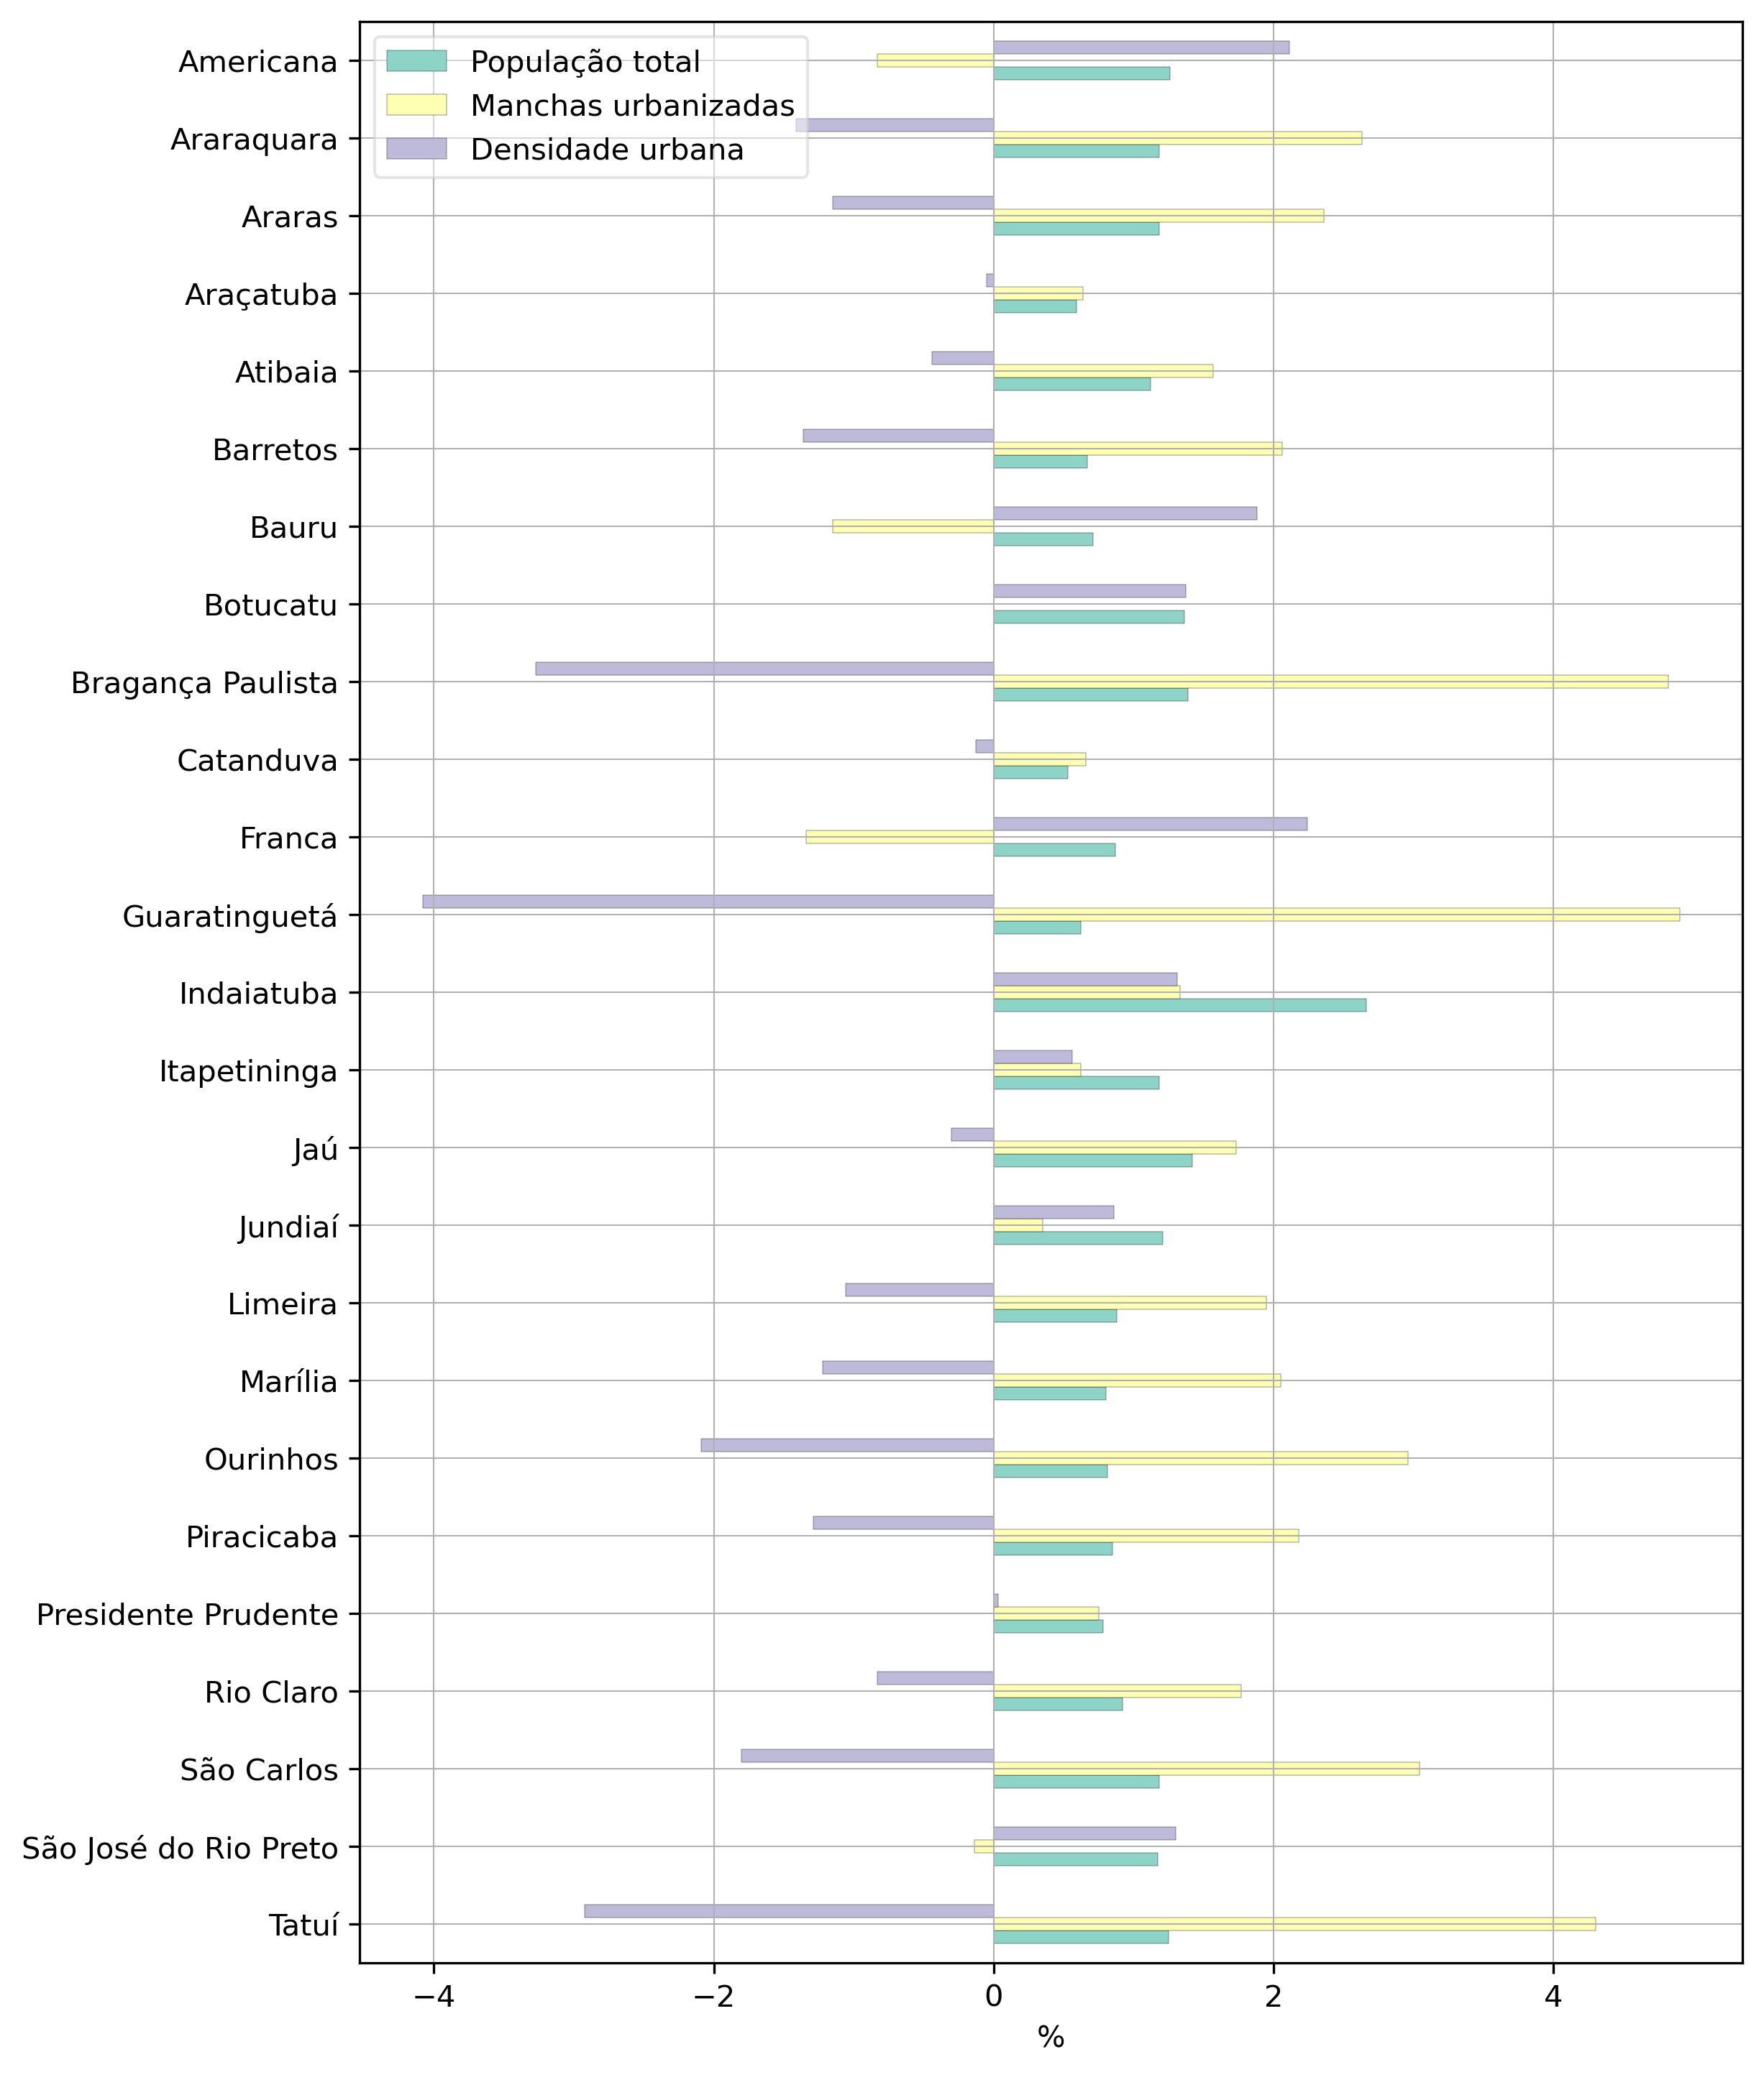

In [95]:
# TGCA por município (2005-2015)

# Tamanho da figura compatível com papel A4
fig, ax = plt.subplots(figsize=(8.27,11.69), dpi=300)
    
# legenda e cores do gráfico
labels = ['População total', 'Manchas urbanizadas', 'Densidade urbana']
    
# Gráfico de barras horizontais
df_tgca.sort_values('Municipio', 
                    ascending=False).plot(y=['TGCA_pop_%', 'TGCA_area_%', 'TGCA_dens_%'], 
                                          x='Municipio', kind='barh', label=labels, 
                                          color=['#8dd3c7','#ffffb3','#bebada'], edgecolor='black', 
                                          linewidth=0.1, ax=ax)
    
# Título, rótulos dos eixos, grid e posição da legenda
ax.set_title('')
ax.set_xlabel('%')
ax.set_ylabel('')
ax.grid(linewidth=0.5)
ax.legend(fancybox=True, framealpha=0.5, loc='upper left')

# Configurações da figura
plt.savefig('figuras/fig_5.png', dpi=300, bbox_inches ='tight', format='png')
plt.show()

---

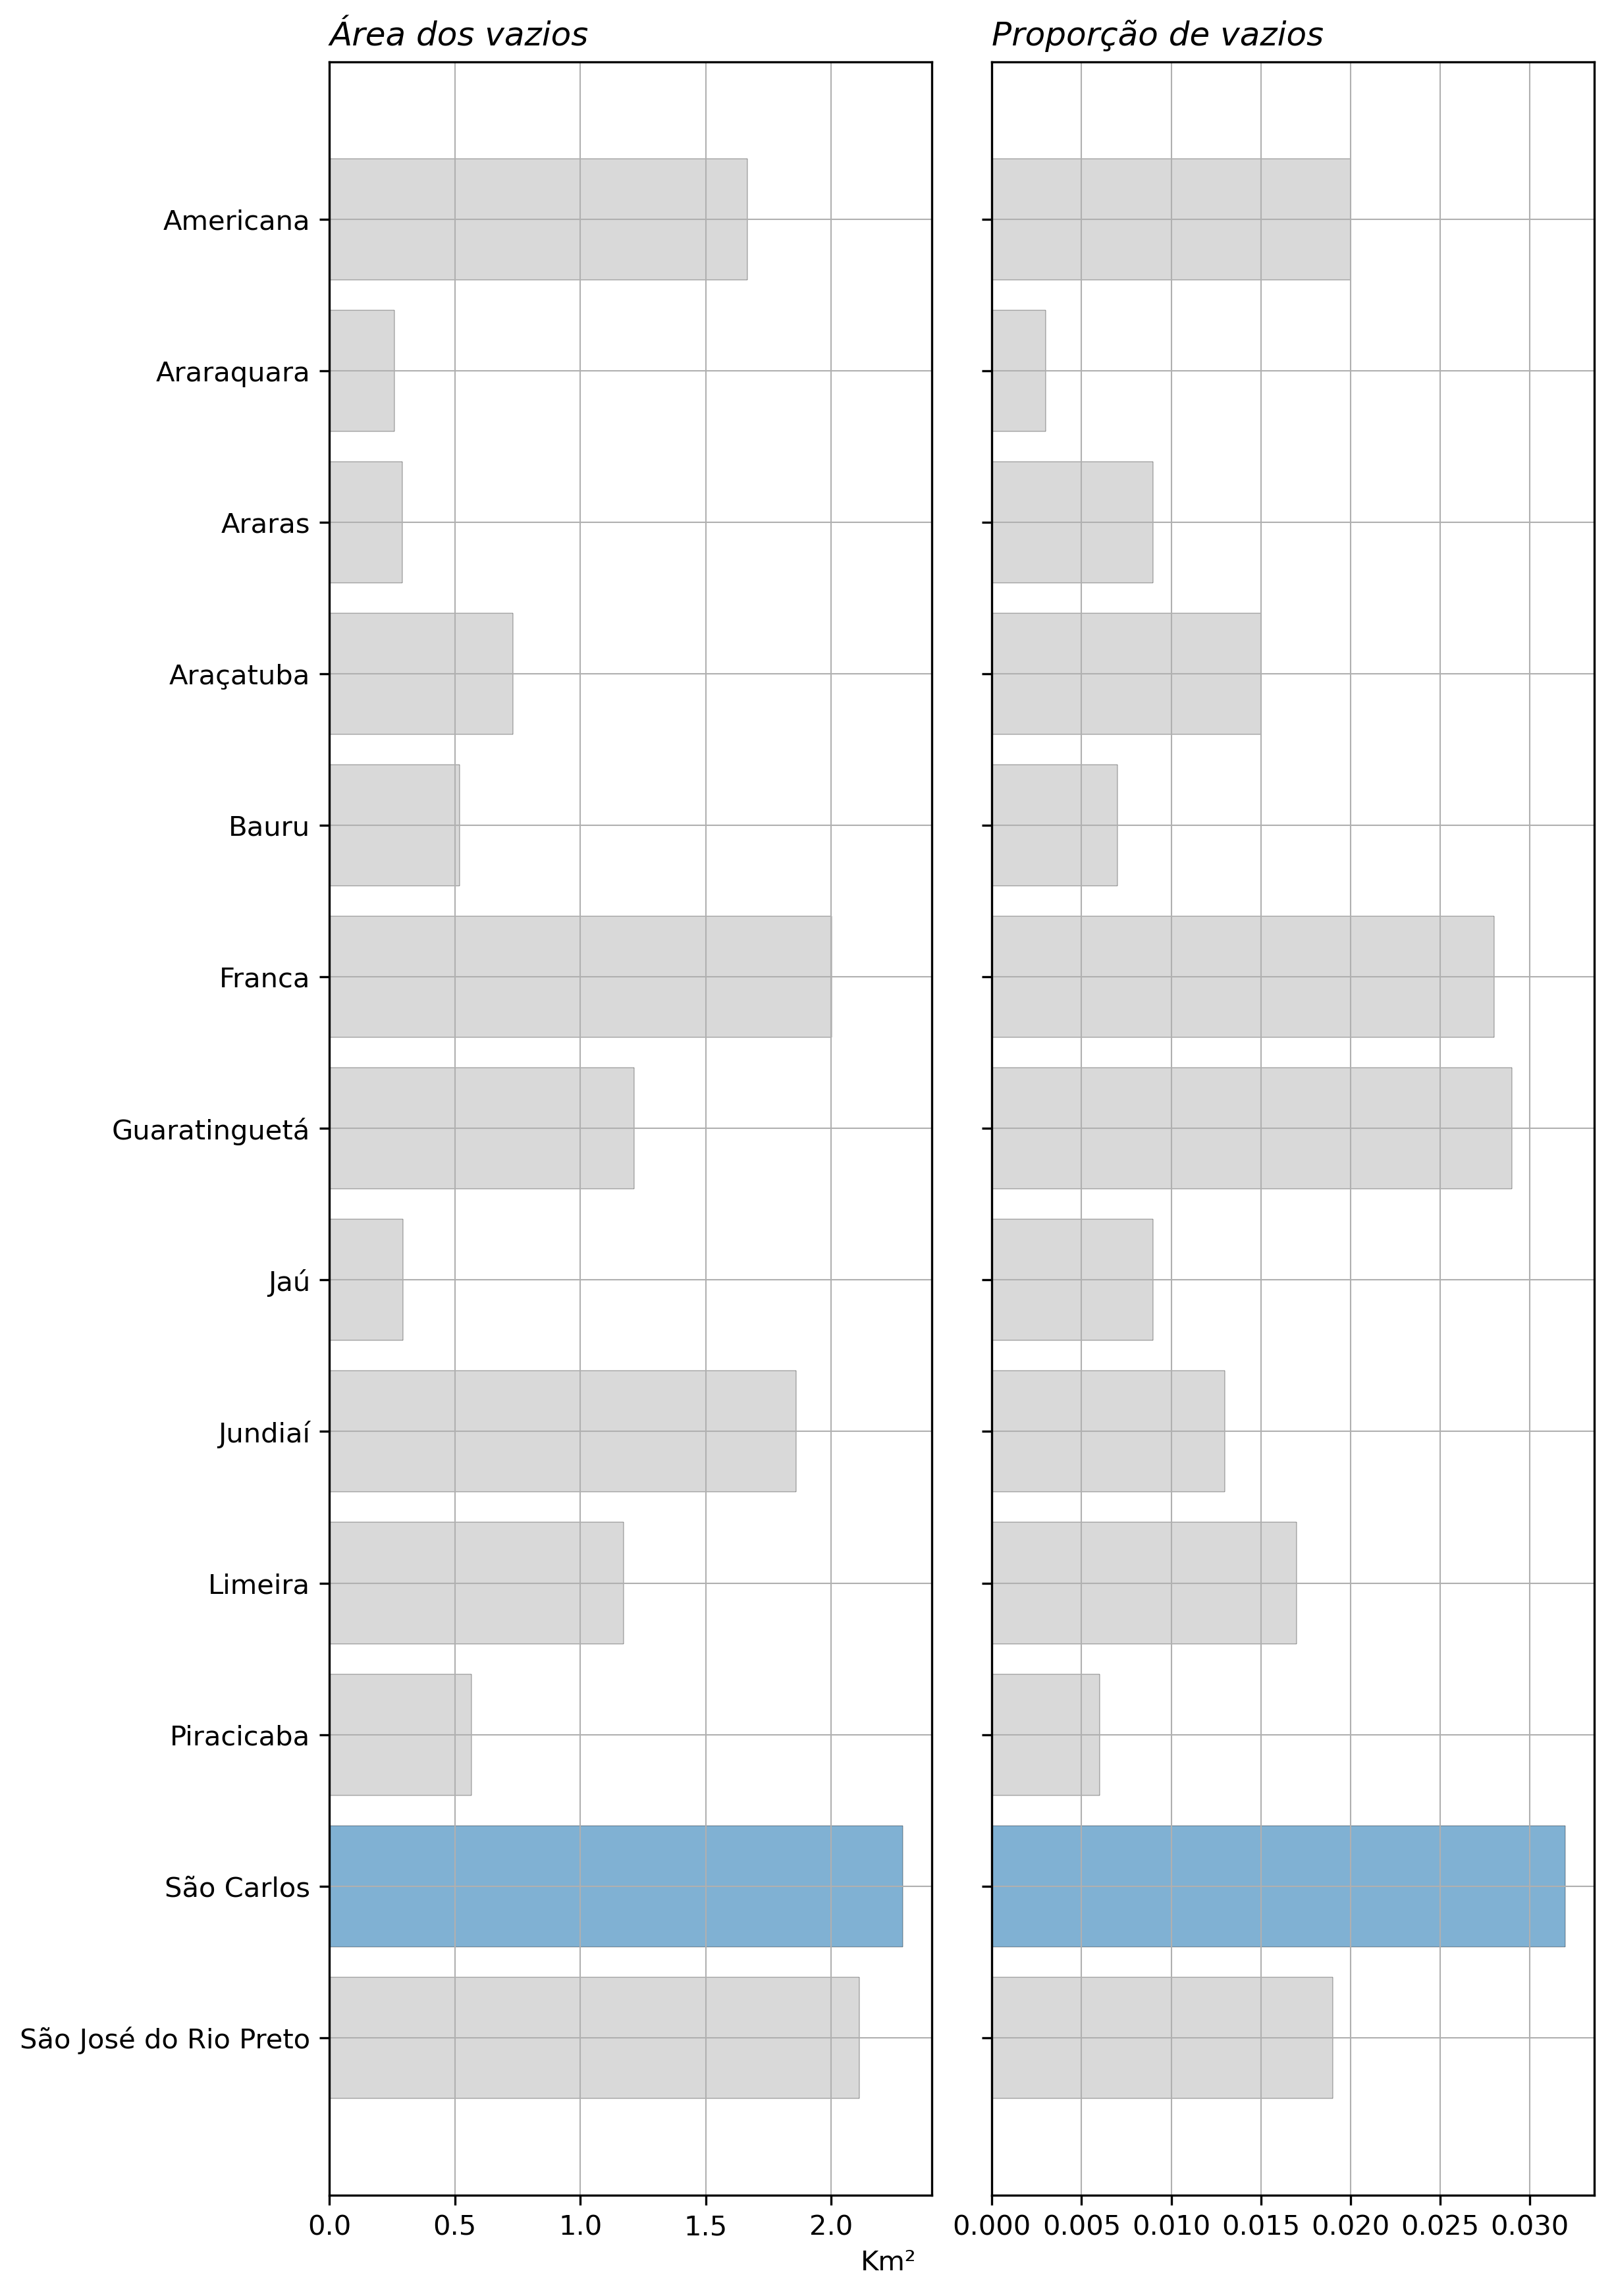

In [96]:
# Organiza índices por ordem descendente
s1 = s1.sort_index(ascending=False)
s2 = s2.sort_index(ascending=False)

# Tamanho da figura compatível com papel A4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.27,11.69), dpi=300, sharey=True)

# Cores das barras (destaque para São Carlos, SP)
blue = '#80b1d3'
gray = '#d9d9d9'

# Lista de cores para cada barra
colors = [blue if municipio == 'São Carlos' else gray for municipio in s1.index]

# Área (km²) dos vazios, com ordenação alfabética (eaquerda)
ax1.barh(s1.index, s1.values, color=colors, edgecolor='black', linewidth=0.1)
ax1.set_title('Área dos vazios', loc='left', fontstyle='italic')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(linewidth=0.5)

# Área ponderada (km²) dos vazios, com ordenação alfabética (direita)
ax2.barh(s2.index, s2.values, color=colors, edgecolor='black', linewidth=0.1)
ax2.set_title('Proporção de vazios', loc='left', fontstyle='italic')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(linewidth=0.5)

# Configurações da figura
fig.suptitle('')
fig.text(0.55, 0, 'Km²', ha='center')

plt.tight_layout()
plt.savefig('figuras/fig_6.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

---